In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from datetime import date, timedelta
from sklearn.model_selection import KFold

from statsmodels.tsa.seasonal import seasonal_decompose

### **DATASET CONSUMPTIONS**

##### **Importing the data**

In [3]:
# Read dataset
d = pd.read_csv('./data/Consumptions.csv', sep=";")
d


,CUPS,ZipCode,Rate,Date,Hour,Value
0,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,1,502
1,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,2,418
2,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,3,418
3,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,4,418
4,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,5,418
...,...,...,...,...,...,...
3591726,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,22,288
3591727,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,23,480
3591728,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,23,480
3591729,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,24,356


##### **Cleaning the data**

In [4]:
d['Date'] = d['Date'].astype("string")
d["Year"] = d['Date'].str[:4]
d["Month"] = d['Date'].str[5:7]
d["Day"] = d['Date'].str[8:]
d

d

,CUPS,ZipCode,Rate,Date,Hour,Value,Year,Month,Day
0,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,1,502,2016,06,01
1,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,2,418,2016,06,01
2,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,3,418,2016,06,01
3,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,4,418,2016,06,01
4,F0216555032235ABF9A1515F221C3F7F,11403,2.0A,2016-06-01,5,418,2016,06,01
...,...,...,...,...,...,...,...,...,...
3591726,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,22,288,2017,06,30
3591727,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,23,480,2017,06,30
3591728,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,23,480,2017,06,30
3591729,22C0D39C8F5117F526F8A13BBE0D28C6,39300,2.0DHA,2017-06-30,24,356,2017,06,30


In [5]:
d = d.drop(columns=["Date", "CUPS", "ZipCode"])
d

,Rate,Hour,Value,Year,Month,Day
0,2.0A,1,502,2016,06,01
1,2.0A,2,418,2016,06,01
2,2.0A,3,418,2016,06,01
3,2.0A,4,418,2016,06,01
4,2.0A,5,418,2016,06,01
...,...,...,...,...,...,...
3591726,2.0DHA,22,288,2017,06,30
3591727,2.0DHA,23,480,2017,06,30
3591728,2.0DHA,23,480,2017,06,30
3591729,2.0DHA,24,356,2017,06,30


In [6]:
# Cheking the tyeps for each columns, when want month and day to be integers
print("Before: ", d.dtypes , "\n")

d['Month'] = d['Month'].astype("int")
d['Day'] = d['Day'].astype("int")
d['Year'] = d['Year'].astype("int")

print("After: ", d.dtypes)

Before:  Rate     object
Hour      int64
Value     int64
Year     string
Month    string
Day      string
dtype: object 

After:  Rate     object
Hour      int64
Value     int64
Year      int32
Month     int32
Day       int32
dtype: object


##### **Visualizing the data**

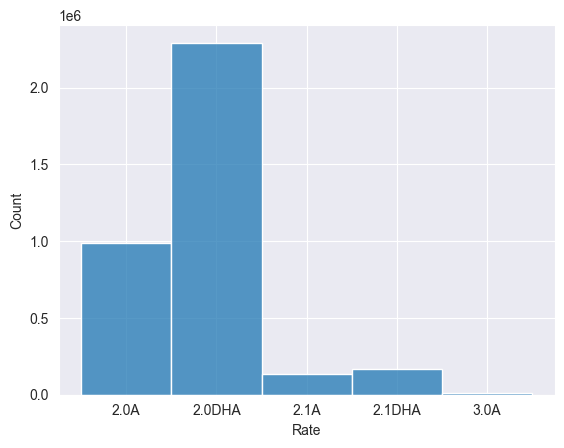

<Figure size 640x480 with 0 Axes>

In [7]:
sns.histplot(d['Rate']);
fig = plt.figure()

C:\Users\lucac\AppData\Local\Temp\ipykernel_18996\3283830238.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['Hour']);


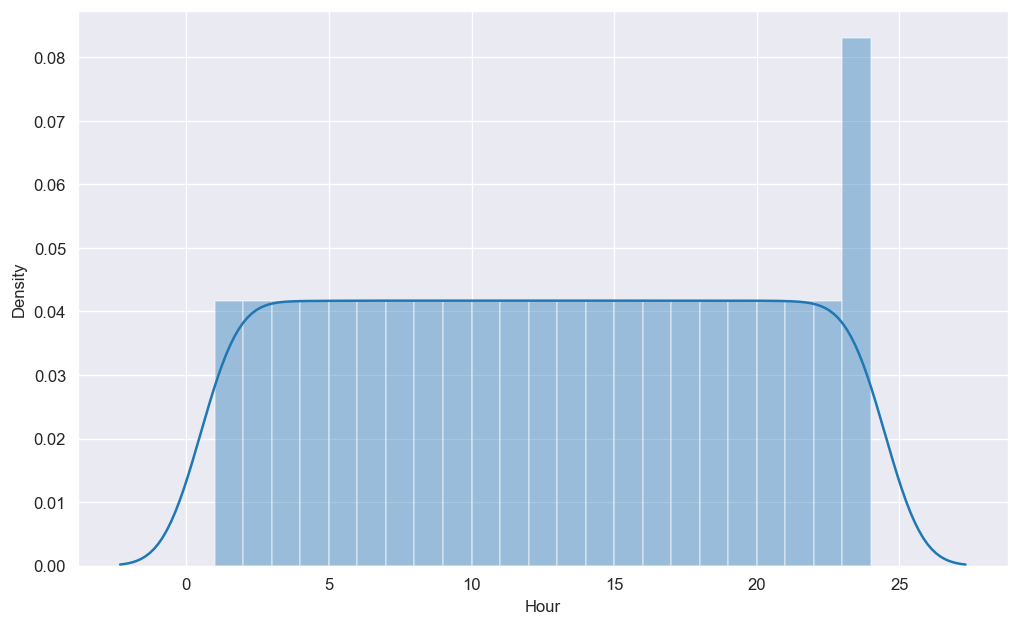

<Figure size 1200x720 with 0 Axes>

In [100]:
sns.distplot(d['Hour']);
fig = plt.figure()

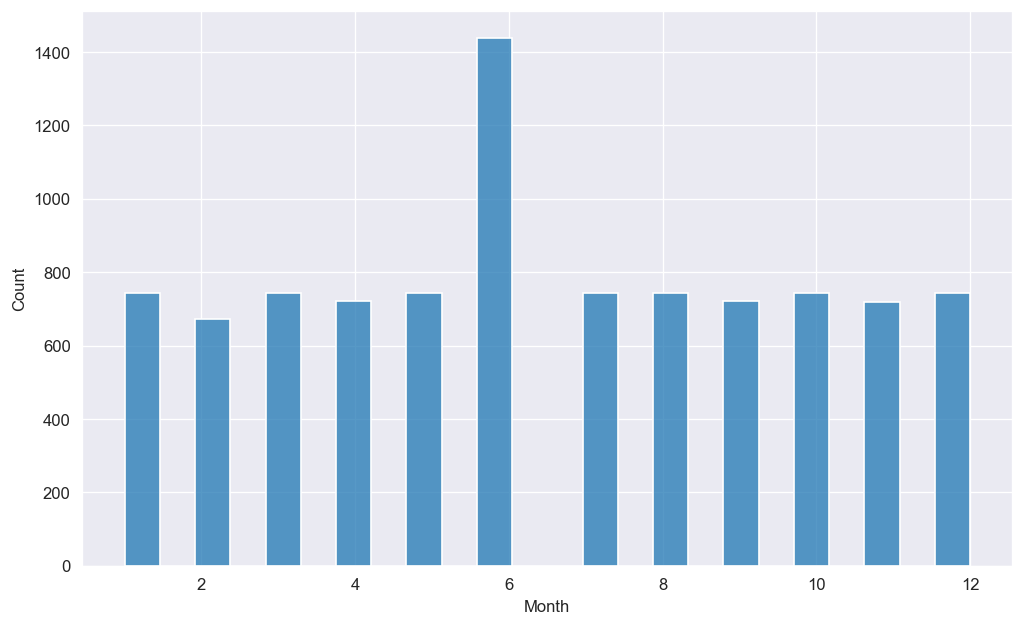

<Figure size 1200x720 with 0 Axes>

In [101]:
sns.histplot(d['Month']);
fig = plt.figure()

C:\Users\lucac\AppData\Local\Temp\ipykernel_18996\1814493476.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d['Day']);


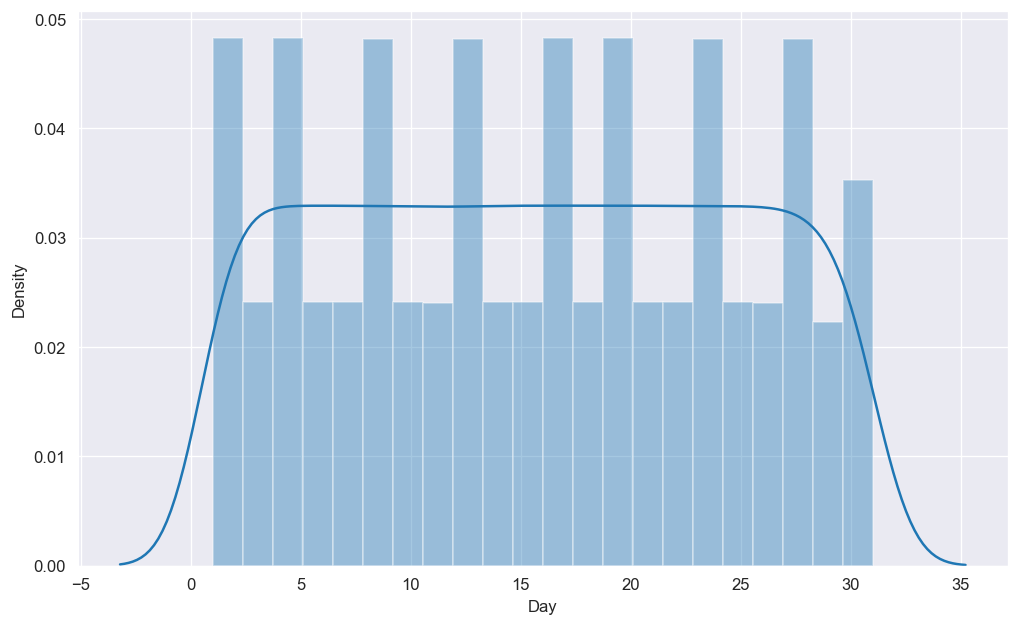

<Figure size 1200x720 with 0 Axes>

In [102]:
sns.distplot(d['Day']);
fig = plt.figure()

In [104]:
sns.distplot(d['Value']);
fig = plt.figure()

KeyError: 'Value'

In [13]:
d.describe()

,Hour,Value,Year,Month,Day
count,3.591731e+06,3.591731e+06,3.591731e+06,3.591731e+06,3.591731e+06
mean,1.249828e+01,4.344181e+02,2.016754e+03,5.390134e+00,1.615737e+01
std,6.921045e+00,8.281349e+02,4.307126e-01,2.847552e+00,8.737294e+00
min,1.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00
25%,6.000000e+00,7.600000e+01,2.017000e+03,3.000000e+00,9.000000e+00
50%,1.200000e+01,1.710000e+02,2.017000e+03,5.000000e+00,1.600000e+01
75%,1.800000e+01,4.200000e+02,2.017000e+03,6.000000e+00,2.400000e+01
max,2.400000e+01,1.703100e+04,2.017000e+03,1.200000e+01,3.100000e+01


In [14]:
#Scatter plot
#fig, ax = plt.subplots(figsize = (18,10))
#ax.scatter(d['Value'], d['Rate'])
 
# x-axis label
#ax.set_xlabel('Value')
 
# y-axis label
#ax.set_ylabel('Rate')
#plt.show()

### **Tranforming the Rate**

In [15]:
def encode_type(rate):
    if rate == '2.0A':
        return 1
    if rate == '2.0DHA':
        return 2
    if rate == '2.1A':
        return 3
    if rate == '2.1DHA':
        return 4
    if rate == '3.0A':
        return 5
    
d['Rate'] = d['Rate'].transform(encode_type)
d

,Rate,Hour,Value,Year,Month,Day
0,1,1,502,2016,6,1
1,1,2,418,2016,6,1
2,1,3,418,2016,6,1
3,1,4,418,2016,6,1
4,1,5,418,2016,6,1
...,...,...,...,...,...,...
3591726,2,22,288,2017,6,30
3591727,2,23,480,2017,6,30
3591728,2,23,480,2017,6,30
3591729,2,24,356,2017,6,30


In [16]:
d = pd.concat([d.groupby(["Year", "Month", "Day", "Hour"])["Rate"].mean(), d.groupby(["Year", "Month", "Day", "Hour"])['Value'].sum()], axis=1).reset_index()

#d = d.groupby(["Year", "Month", "Day", "Hour"]).sum().reset_index()
d

,Year,Month,Day,Hour,Rate,Value
0,2016,6,1,1,1.637097,46257
1,2016,6,1,2,1.637097,32488
2,2016,6,1,3,1.637097,28666
3,2016,6,1,4,1.637097,29334
4,2016,6,1,5,1.637097,27025
...,...,...,...,...,...,...
9474,2017,6,30,20,1.949905,377980
9475,2017,6,30,21,1.949905,388733
9476,2017,6,30,22,1.949905,419423
9477,2017,6,30,23,1.949905,427963


In [17]:
df2 = pd.DataFrame(columns=["Date", "Rate"])

df2["Date"] = d["Year"].astype("string") + "-" + d["Month"].astype("string") + "-" + d["Day"].astype("string") + "-" + d["Hour"] .astype("string")
df2["Rate"] = d["Rate"]
#sns.lineplot(x = df2["Date"], y=df2['Rate'])
#fig = plt.figure()

In [18]:
d.describe()

,Year,Month,Day,Hour,Rate,Value
count,9479.000000,9479.000000,9479.000000,9479.000000,9479.000000,9479.000000
mean,2016.458171,6.486444,15.702711,12.501108,1.782335,164607.333368
std,0.498274,3.317420,8.786117,6.922077,0.127280,111109.927526
min,2016.000000,1.000000,1.000000,1.000000,1.592593,27025.000000
25%,2016.000000,4.000000,8.000000,7.000000,1.652174,81899.000000
50%,2016.000000,6.000000,16.000000,13.000000,1.770833,124532.000000
75%,2017.000000,9.000000,23.000000,18.500000,1.913961,236395.000000
max,2017.000000,12.000000,31.000000,24.000000,1.956140,654179.000000


#### **Outliers**

In [19]:
# Remove rows where at least 1 col has outliers and then print the space
# First select the columns that have a number type
print("Before outlier detection: ", d.shape)

num_col = d.dtypes[d.dtypes != "object"].index
cols = [i for i in num_col]

# Outlier when is at 3 standard deviation away (bot + or -)
for col in cols :
    mean = d[col].mean()
    sd = d[col].std()
        
    cld = d[(d[col] <= mean+(3*sd))]


print("After outlier detection: ",d.shape)

Before outlier detection:  (9479, 6)
After outlier detection:  (9479, 6)


# **EXTERNAL DATA**

#### **DATASET ENERGY GENERATED SPAIN**

Dataset taken from kaggle
https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather?resource=download

##### **Importing the data**

In [21]:
energy_gen_data = pd.read_csv('./data/energy_dataset.csv',sep=',')
energy_gen_data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


##### **Cleaning the data**

In [22]:
# Getting all columns name
for col in energy_gen_data.columns:
    print(col)

time
generation biomass
generation fossil brown coal/lignite
generation fossil coal-derived gas
generation fossil gas
generation fossil hard coal
generation fossil oil
generation fossil oil shale
generation fossil peat
generation geothermal
generation hydro pumped storage aggregated
generation hydro pumped storage consumption
generation hydro run-of-river and poundage
generation hydro water reservoir
generation marine
generation nuclear
generation other
generation other renewable
generation solar
generation waste
generation wind offshore
generation wind onshore
forecast solar day ahead
forecast wind offshore eday ahead
forecast wind onshore day ahead
total load forecast
total load actual
price day ahead
price actual


In [23]:
# dropping the columns that do not matter to us
energy_gen_data = energy_gen_data.drop(columns=["forecast solar day ahead" , "generation hydro pumped storage aggregated","forecast wind offshore eday ahead", "forecast wind onshore day ahead", "total load forecast", "total load actual","price day ahead"])

energy_gen_data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,4836.0,0.0,6073.0,63.0,95.0,85.0,277.0,0.0,3113.0,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,3931.0,0.0,6074.0,62.0,95.0,33.0,280.0,0.0,3288.0,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,2831.0,0.0,6076.0,61.0,94.0,31.0,286.0,0.0,3503.0,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,2068.0,0.0,6075.0,61.0,93.0,31.0,287.0,0.0,3586.0,69.89


In [24]:
# Removing the data that do not matter to us
# Since we are interested in the date between the 08-01 and 11-01 we are going to drop the other dates
initial_date = "2016-06-01"
finish_date = "2017-12-31"

# Drop everything after 2016-12-01
energy_gen_data = energy_gen_data[energy_gen_data["time"] < finish_date]

# Drop everything before 2016-07-01
energy_gen_data = energy_gen_data[energy_gen_data["time"] >= initial_date]
energy_gen_data

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,price actual
12407,2016-06-01 00:00:00+02:00,376.0,0.0,0.0,3673.0,1354.0,360.0,0.0,0.0,0.0,...,2504.0,0.0,6090.0,86.0,70.0,23.0,199.0,0.0,13460.0,45.34
12408,2016-06-01 01:00:00+02:00,369.0,0.0,0.0,3620.0,1130.0,354.0,0.0,0.0,0.0,...,2421.0,0.0,6087.0,88.0,68.0,23.0,198.0,0.0,13307.0,41.00
12409,2016-06-01 02:00:00+02:00,371.0,0.0,0.0,3478.0,983.0,358.0,0.0,0.0,0.0,...,1929.0,0.0,6084.0,88.0,68.0,23.0,198.0,0.0,13202.0,39.32
12410,2016-06-01 03:00:00+02:00,367.0,0.0,0.0,3654.0,951.0,354.0,0.0,0.0,0.0,...,1587.0,0.0,6084.0,87.0,67.0,23.0,198.0,0.0,12973.0,35.76
12411,2016-06-01 04:00:00+02:00,370.0,0.0,0.0,3626.0,943.0,356.0,0.0,0.0,0.0,...,1500.0,0.0,6085.0,88.0,68.0,23.0,197.0,0.0,13126.0,35.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2017-12-30 19:00:00+01:00,286.0,0.0,0.0,3960.0,1039.0,208.0,0.0,0.0,0.0,...,4593.0,0.0,7094.0,53.0,88.0,59.0,302.0,0.0,7747.0,62.92
26276,2017-12-30 20:00:00+01:00,282.0,0.0,0.0,3918.0,1053.0,220.0,0.0,0.0,0.0,...,4582.0,0.0,7098.0,54.0,91.0,39.0,307.0,0.0,7595.0,62.10
26277,2017-12-30 21:00:00+01:00,284.0,0.0,0.0,3867.0,1048.0,228.0,0.0,0.0,0.0,...,4368.0,0.0,7100.0,54.0,92.0,36.0,307.0,0.0,7599.0,60.09
26278,2017-12-30 22:00:00+01:00,280.0,0.0,0.0,4033.0,928.0,225.0,0.0,0.0,0.0,...,4027.0,0.0,7101.0,54.0,91.0,35.0,313.0,0.0,7314.0,55.85


In [25]:
energy_gen_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13873 entries, 12407 to 26279
Data columns (total 22 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         13873 non-null  object 
 1   generation biomass                           13871 non-null  float64
 2   generation fossil brown coal/lignite         13872 non-null  float64
 3   generation fossil coal-derived gas           13872 non-null  float64
 4   generation fossil gas                        13872 non-null  float64
 5   generation fossil hard coal                  13872 non-null  float64
 6   generation fossil oil                        13871 non-null  float64
 7   generation fossil oil shale                  13872 non-null  float64
 8   generation fossil peat                       13872 non-null  float64
 9   generation geothermal                        13872 non-null  float64

In [26]:
print("Null values: \n", energy_gen_data.isnull().sum().sort_values(ascending=False))
energy_gen_data = energy_gen_data.dropna()

Null values: 
 generation hydro run-of-river and poundage     2
generation hydro pumped storage consumption    2
generation fossil oil                          2
generation marine                              2
generation biomass                             2
generation solar                               1
generation other renewable                     1
generation other                               1
generation wind onshore                        1
generation hydro water reservoir               1
generation geothermal                          1
generation wind offshore                       1
generation fossil peat                         1
generation fossil oil shale                    1
generation fossil hard coal                    1
generation fossil gas                          1
generation fossil coal-derived gas             1
generation fossil brown coal/lignite           1
generation waste                               1
time                                           0
gener

In [27]:
print("Null values: \n", energy_gen_data.isnull().sum().sort_values(ascending=False))

energy_gen_data.info()

Null values: 
 time                                           0
generation biomass                             0
generation wind onshore                        0
generation wind offshore                       0
generation waste                               0
generation solar                               0
generation other renewable                     0
generation other                               0
generation nuclear                             0
generation marine                              0
generation hydro water reservoir               0
generation hydro run-of-river and poundage     0
generation hydro pumped storage consumption    0
generation geothermal                          0
generation fossil peat                         0
generation fossil oil shale                    0
generation fossil oil                          0
generation fossil hard coal                    0
generation fossil gas                          0
generation fossil coal-derived gas             0
gener

In [28]:
# Aggregating all the columns to have toal energy produced and price for each date
# ALl the data summed together are in MW
energy_gen_data["TotalEnergyGenerated"] = (
    energy_gen_data["generation biomass"] +
    energy_gen_data["generation fossil brown coal/lignite"] +
    energy_gen_data["generation fossil coal-derived gas"] +
    energy_gen_data["generation fossil gas"] +
    energy_gen_data["generation fossil hard coal"] +
    energy_gen_data["generation fossil oil"] +
    energy_gen_data["generation fossil oil shale"] +
    energy_gen_data["generation fossil peat"] +
    energy_gen_data["generation geothermal"] +
    energy_gen_data["generation hydro pumped storage consumption"] +
    energy_gen_data["generation hydro run-of-river and poundage"] +
    energy_gen_data["generation hydro water reservoir"] +
    energy_gen_data["generation marine"] +
    energy_gen_data["generation nuclear"] +
    energy_gen_data["generation other"] +
    energy_gen_data["generation other renewable"] +
    energy_gen_data["generation solar"] +
    energy_gen_data["generation waste"] +
    energy_gen_data["generation wind offshore"] +
    energy_gen_data["generation wind onshore"] 
)


energy_gen_data


C:\Users\lucac\AppData\Local\Temp\ipykernel_18996\288533764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_gen_data["TotalEnergyGenerated"] = (


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,price actual,TotalEnergyGenerated
12407,2016-06-01 00:00:00+02:00,376.0,0.0,0.0,3673.0,1354.0,360.0,0.0,0.0,0.0,...,0.0,6090.0,86.0,70.0,23.0,199.0,0.0,13460.0,45.34,30850.0
12408,2016-06-01 01:00:00+02:00,369.0,0.0,0.0,3620.0,1130.0,354.0,0.0,0.0,0.0,...,0.0,6087.0,88.0,68.0,23.0,198.0,0.0,13307.0,41.00,31420.0
12409,2016-06-01 02:00:00+02:00,371.0,0.0,0.0,3478.0,983.0,358.0,0.0,0.0,0.0,...,0.0,6084.0,88.0,68.0,23.0,198.0,0.0,13202.0,39.32,31343.0
12410,2016-06-01 03:00:00+02:00,367.0,0.0,0.0,3654.0,951.0,354.0,0.0,0.0,0.0,...,0.0,6084.0,87.0,67.0,23.0,198.0,0.0,12973.0,35.76,31108.0
12411,2016-06-01 04:00:00+02:00,370.0,0.0,0.0,3626.0,943.0,356.0,0.0,0.0,0.0,...,0.0,6085.0,88.0,68.0,23.0,197.0,0.0,13126.0,35.92,31176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2017-12-30 19:00:00+01:00,286.0,0.0,0.0,3960.0,1039.0,208.0,0.0,0.0,0.0,...,0.0,7094.0,53.0,88.0,59.0,302.0,0.0,7747.0,62.92,26569.0
26276,2017-12-30 20:00:00+01:00,282.0,0.0,0.0,3918.0,1053.0,220.0,0.0,0.0,0.0,...,0.0,7098.0,54.0,91.0,39.0,307.0,0.0,7595.0,62.10,26399.0
26277,2017-12-30 21:00:00+01:00,284.0,0.0,0.0,3867.0,1048.0,228.0,0.0,0.0,0.0,...,0.0,7100.0,54.0,92.0,36.0,307.0,0.0,7599.0,60.09,26141.0
26278,2017-12-30 22:00:00+01:00,280.0,0.0,0.0,4033.0,928.0,225.0,0.0,0.0,0.0,...,0.0,7101.0,54.0,91.0,35.0,313.0,0.0,7314.0,55.85,25516.0


In [29]:
# Creating a second dataframe with only the data we care about
clean_energy = pd.DataFrame(columns=["Date", "TotalEnergyGenerated_MW", "Price_EUR_MWh"])
clean_energy["Date"] = energy_gen_data["time"]
clean_energy["TotalEnergyGenerated_MW"] = energy_gen_data["TotalEnergyGenerated"]
clean_energy["Price_EUR_MWh"] = energy_gen_data["price actual"]
clean_energy

,Date,TotalEnergyGenerated_MW,Price_EUR_MWh
12407,2016-06-01 00:00:00+02:00,30850.0,45.34
12408,2016-06-01 01:00:00+02:00,31420.0,41.00
12409,2016-06-01 02:00:00+02:00,31343.0,39.32
12410,2016-06-01 03:00:00+02:00,31108.0,35.76
12411,2016-06-01 04:00:00+02:00,31176.0,35.92
...,...,...,...
26275,2017-12-30 19:00:00+01:00,26569.0,62.92
26276,2017-12-30 20:00:00+01:00,26399.0,62.10
26277,2017-12-30 21:00:00+01:00,26141.0,60.09
26278,2017-12-30 22:00:00+01:00,25516.0,55.85


##### **Visualizing the data**

In [30]:
#sns.lineplot(data=clean_energy, x="Date", y="TotalEnergyGenerated_MW")
# plt.plot(clean_energy["Date"], clean_energy['TotalEnergyGenerated_MW'])
# plt.title('TotalEnergyGenerated_MW')
# plt.xlabel('Date')
# plt.ylabel('TotalEnergyGenerated_MW')
# plt.show()plt.plot(df2["Date"], df2['Value'])


In [31]:
#sns.lineplot(data=clean_energy, x="Date", y="Price_EUR_MWh")
#plt.plot(clean_energy["Date"], clean_energy['Price_EUR_MWh'])
# plt.title('Price_EUR_MWh')
# plt.xlabel('Date')
# plt.ylabel('Price_EUR_MWh')
# plt.show()

#### **Adding the data to the consumption dataset**
First we eneed to divide the data column into Year, Month, Day and Hour, then we add it tot the respecive date in the consumption dataframe (d)

In [32]:

clean_energy['Date'] = clean_energy['Date'].astype("string")
clean_energy["Year"] = clean_energy['Date'].str[:4]
clean_energy["Month"] = clean_energy['Date'].str[5:7]
clean_energy["Day"] = clean_energy['Date'].str[8:10]
clean_energy["Hour"] = clean_energy['Date'].str[11:13]

clean_energy

,Date,TotalEnergyGenerated_MW,Price_EUR_MWh,Year,Month,Day,Hour
12407,2016-06-01 00:00:00+02:00,30850.0,45.34,2016,06,01,00
12408,2016-06-01 01:00:00+02:00,31420.0,41.00,2016,06,01,01
12409,2016-06-01 02:00:00+02:00,31343.0,39.32,2016,06,01,02
12410,2016-06-01 03:00:00+02:00,31108.0,35.76,2016,06,01,03
12411,2016-06-01 04:00:00+02:00,31176.0,35.92,2016,06,01,04
...,...,...,...,...,...,...,...
26275,2017-12-30 19:00:00+01:00,26569.0,62.92,2017,12,30,19
26276,2017-12-30 20:00:00+01:00,26399.0,62.10,2017,12,30,20
26277,2017-12-30 21:00:00+01:00,26141.0,60.09,2017,12,30,21
26278,2017-12-30 22:00:00+01:00,25516.0,55.85,2017,12,30,22


In [33]:
# Fixing the types
print("Before: ", clean_energy.dtypes , "\n")
clean_energy['Year'] = clean_energy['Year'].astype("int")
clean_energy['Month'] = clean_energy['Month'].astype("int")
clean_energy['Day'] = clean_energy['Day'].astype("int")
clean_energy['Hour'] = clean_energy['Hour'].astype("int")
clean_energy = clean_energy.drop(columns=["Date"])
print("After: ", clean_energy.dtypes , "\n")

Before:  Date                        string
TotalEnergyGenerated_MW    float64
Price_EUR_MWh              float64
Year                        string
Month                       string
Day                         string
Hour                        string
dtype: object 

After:  TotalEnergyGenerated_MW    float64
Price_EUR_MWh              float64
Year                         int32
Month                        int32
Day                          int32
Hour                         int32
dtype: object 



In [34]:
# Changing hour = 0 to hour = 24 to match the same hour format of the Consumptions.csv
clean_energy['Hour'].mask(clean_energy['Hour'] == 0, 24, inplace=True)
clean_energy.describe()


,TotalEnergyGenerated_MW,Price_EUR_MWh,Year,Month,Day,Hour
count,13867.000000,13867.000000,13867.000000,13867.000000,13867.000000,13867.000000
mean,28387.220163,57.638971,2016.629985,7.434485,15.720992,12.497656
std,4344.895427,11.922217,0.482826,3.222742,8.794452,6.920885
min,6899.000000,11.980000,2016.000000,1.000000,1.000000,1.000000
25%,25031.500000,49.720000,2016.000000,5.000000,8.000000,6.500000
50%,28104.000000,56.070000,2017.000000,8.000000,16.000000,12.000000
75%,31461.500000,63.415000,2017.000000,10.000000,23.000000,18.000000
max,42310.000000,116.800000,2017.000000,12.000000,31.000000,24.000000


In [35]:

tempd = d.copy()
tempEnergy = clean_energy.copy()

tempd["timestamp"] = tempd["Year"].astype("string") + "-" + tempd["Month"].astype("string") + "-" + tempd["Day"].astype("string") + "-" + tempd["Hour"] .astype("string")
tempEnergy["timestamp"] = tempEnergy["Year"].astype("string") + "-" + tempEnergy["Month"].astype("string") + "-" + tempEnergy["Day"].astype("string") + "-" + tempEnergy["Hour"].astype("string") 

Price_EUR_MWh = []
TotalEnergyGenerated_MW = []


tempd["TotalEnergyGenerated_W"] = np.nan
tempd["Price_EUR_Wh"] = np.nan
for energy_index, energy_time in enumerate(tempEnergy["timestamp"]):
    # Adding and converting onverting M to W and MWh to Wh
    tempd.loc[tempd.timestamp == energy_time, ["TotalEnergyGenerated_W"] ] = tempEnergy["TotalEnergyGenerated_MW"].values[energy_index]
    tempd.loc[tempd.timestamp == energy_time, ["Price_EUR_Wh"] ] = tempEnergy["Price_EUR_MWh"].values[energy_index]

#tempd['TotalEnergyGenerated_W'] = tempd['TotalEnergyGenerated_W'].*(1000000).round(2)
tempd['TotalEnergyGenerated_W'] = tempd['TotalEnergyGenerated_W']*(1000000)
tempd['Price_EUR_Wh'] = tempd['Price_EUR_Wh']*(1/1000000)

# Deseasonalize Energy


In [36]:
tempd = tempd.copy()
print("Null values Before: \n", tempd.isna().sum().sort_values(ascending=False))
tempd = tempd.dropna()
print("Null values After: \n", tempd.isna().sum().sort_values(ascending=False))

Null values Before: 
 TotalEnergyGenerated_W    6
Price_EUR_Wh              6
Year                      0
Month                     0
Day                       0
Hour                      0
Rate                      0
Value                     0
timestamp                 0
dtype: int64
Null values After: 
 Year                      0
Month                     0
Day                       0
Hour                      0
Rate                      0
Value                     0
timestamp                 0
TotalEnergyGenerated_W    0
Price_EUR_Wh              0
dtype: int64


In [37]:
tempd = tempd.copy()
print("Inf values Before: \n", tempd[tempd == np.inf].count())
tempd = tempd.dropna()
print("Inf values After: \n", tempd[tempd == np.inf].count())

Inf values Before: 
 Year                      0
Month                     0
Day                       0
Hour                      0
Rate                      0
Value                     0
timestamp                 0
TotalEnergyGenerated_W    0
Price_EUR_Wh              0
dtype: int64
Inf values After: 
 Year                      0
Month                     0
Day                       0
Hour                      0
Rate                      0
Value                     0
timestamp                 0
TotalEnergyGenerated_W    0
Price_EUR_Wh              0
dtype: int64


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

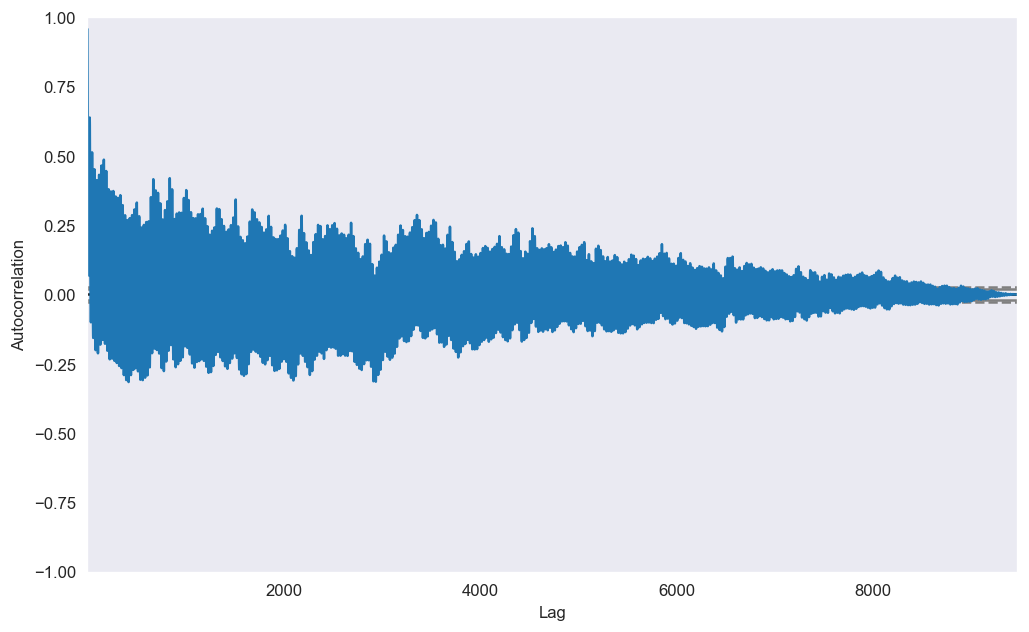

In [38]:
# Test for seasonality of Value
# This goes right after 'Adding temperature to d' markup cell
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(tempd['TotalEnergyGenerated_W'].tolist())

Text(0.5, 1.0, 'Total Energy subtracting least squares fit')

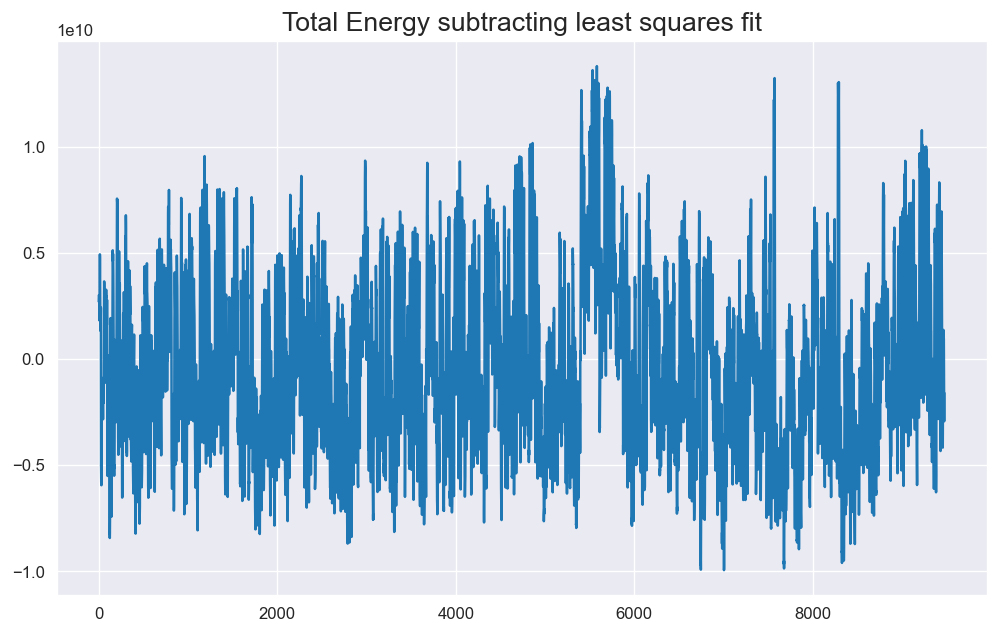

In [39]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrendedTotalE = signal.detrend(tempd['TotalEnergyGenerated_W'].values)
plt.plot(detrendedTotalE)
plt.title('Total Energy subtracting least squares fit', fontsize=16)

Text(0.5, 1.0, 'Total Energy detrended')

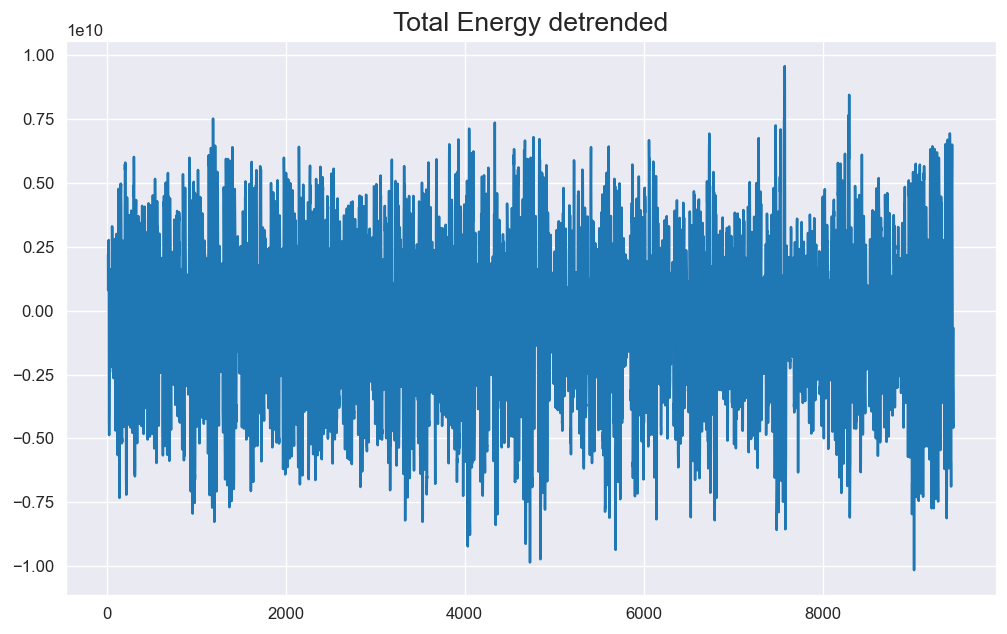

In [44]:
# Using statmodels: Subtracting the Trend Component
result_mulTotalE = seasonal_decompose(tempd['TotalEnergyGenerated_W'], model='multiplicative', period=30)
detrendedTotalE = tempd['TotalEnergyGenerated_W'].values - result_mulTotalE.trend
plt.plot(detrendedTotalE)
plt.title('Total Energy detrended', fontsize=16)

[]

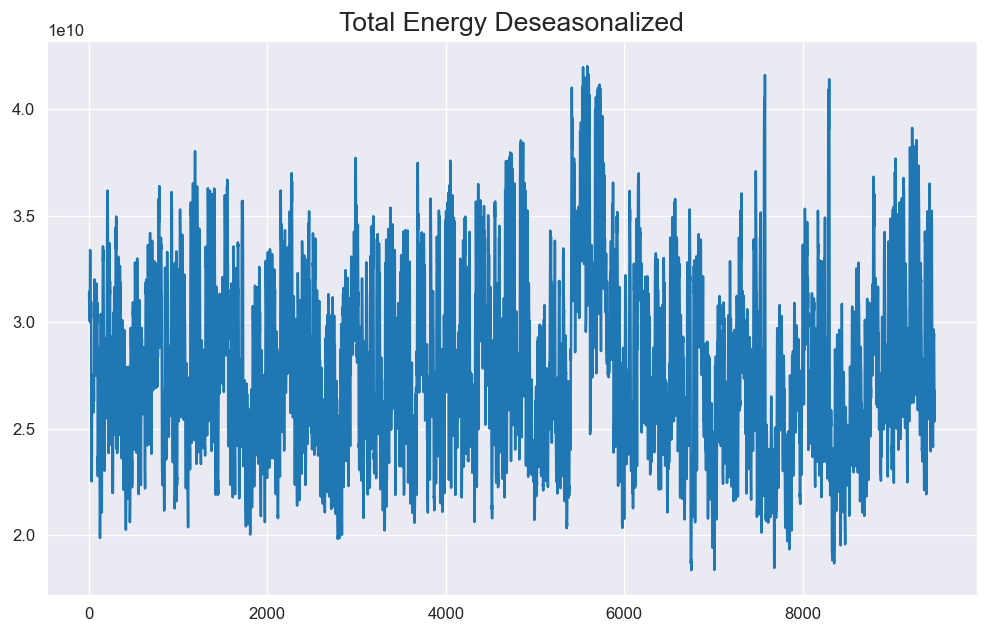

In [45]:
# Subtracting the Trend Component
# Time Series Decomposition
result_mulTotalE = seasonal_decompose(tempd['TotalEnergyGenerated_W'], model='multiplicative', period=30)

# Deseasonalize
deseasonalizedTotalE = tempd['TotalEnergyGenerated_W'].values / result_mulTotalE.seasonal

tempd['TotalEnergyGenerated_W'] = deseasonalizedTotalE

# Plot
plt.plot(deseasonalizedTotalE)
plt.title('Total Energy Deseasonalized', fontsize=16)
plt.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

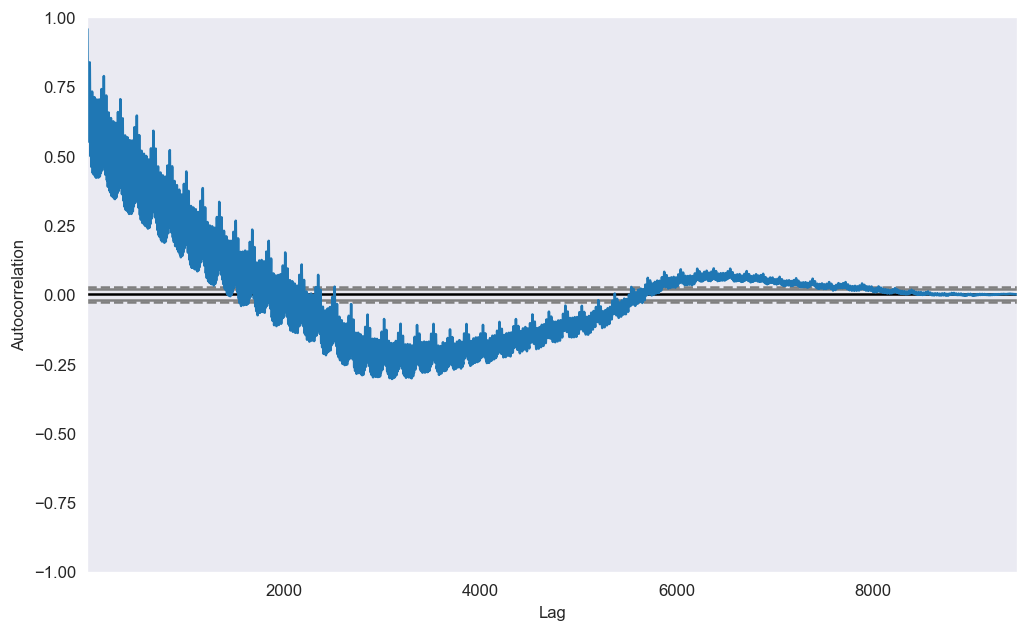

In [46]:
# Test for seasonality of Value
# This goes right after 'Adding temperature to d' markup cell

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(tempd['Price_EUR_Wh'].tolist())

Text(0.5, 1.0, 'Price Energy subtracting least squares fit')

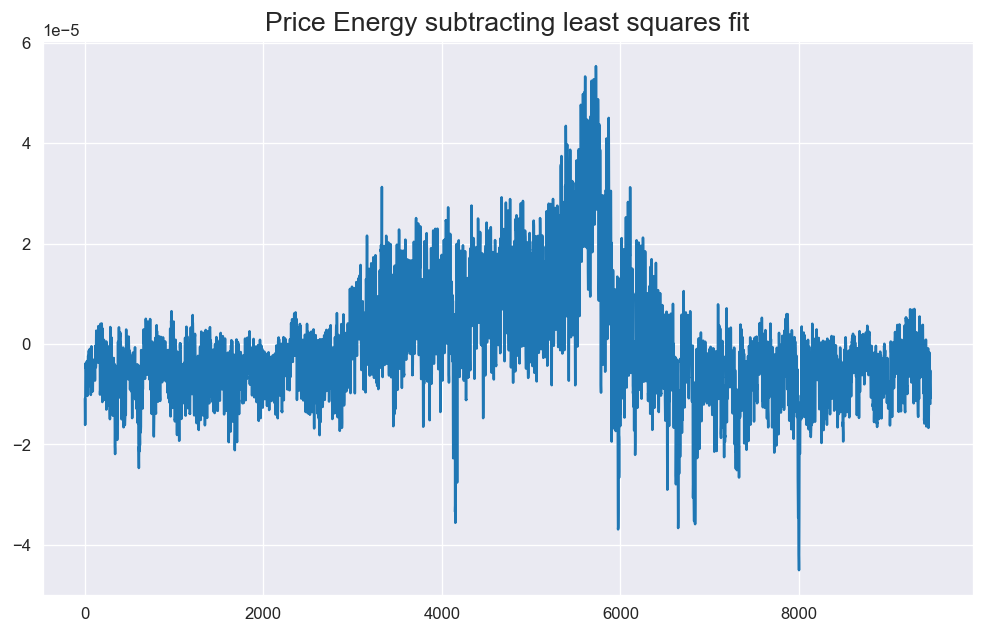

In [47]:
# Using scipy: Subtract the line of best fit
detrendedPriceE = signal.detrend(tempd['Price_EUR_Wh'].values)
plt.plot(detrendedPriceE)
plt.title('Price Energy subtracting least squares fit', fontsize=16)

Text(0.5, 1.0, 'Price Energy detrended')

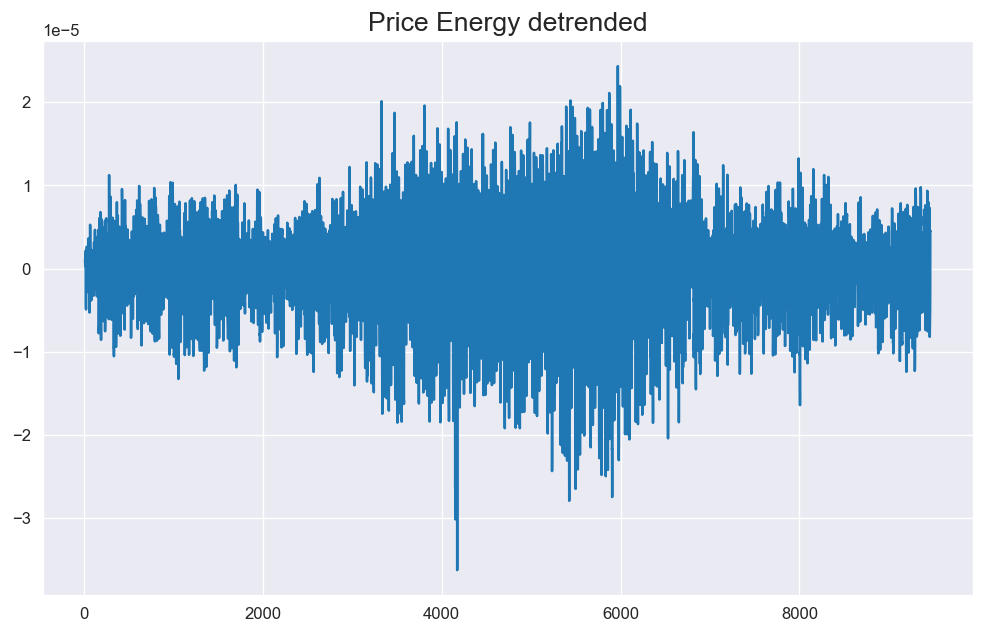

In [48]:
# Using statmodels: Subtracting the Trend Component
# Time Series Decomposition
result_mulPriceE = seasonal_decompose(tempd['Price_EUR_Wh'], model='multiplicative', period=30)
detrendedPriceE = tempd['Price_EUR_Wh'].values - result_mulPriceE.trend
plt.plot(detrendedPriceE)
plt.title('Price Energy detrended', fontsize=16)

In [49]:
# Time Series Decomposition

# Deseasonalize
deseasonalizedPriceE = tempd['Price_EUR_Wh'].values / result_mulPriceE.seasonal
tempd['Price_EUR_Wh'] = deseasonalizedPriceE

In [50]:
d = tempd.drop(columns=["timestamp"])
d

,Year,Month,Day,Hour,Rate,Value,TotalEnergyGenerated_W,Price_EUR_Wh
0,2016,6,1,1,1.637097,46257,3.134861e+10,0.000041
1,2016,6,1,2,1.637097,32488,3.116080e+10,0.000039
2,2016,6,1,3,1.637097,28666,3.082493e+10,0.000036
3,2016,6,1,4,1.637097,29334,3.097496e+10,0.000036
4,2016,6,1,5,1.637097,27025,3.128076e+10,0.000040
...,...,...,...,...,...,...,...,...
9474,2017,6,30,20,1.949905,377980,2.870566e+10,0.000051
9475,2017,6,30,21,1.949905,388733,2.736111e+10,0.000054
9476,2017,6,30,22,1.949905,419423,2.660606e+10,0.000056
9477,2017,6,30,23,1.949905,427963,2.534345e+10,0.000052


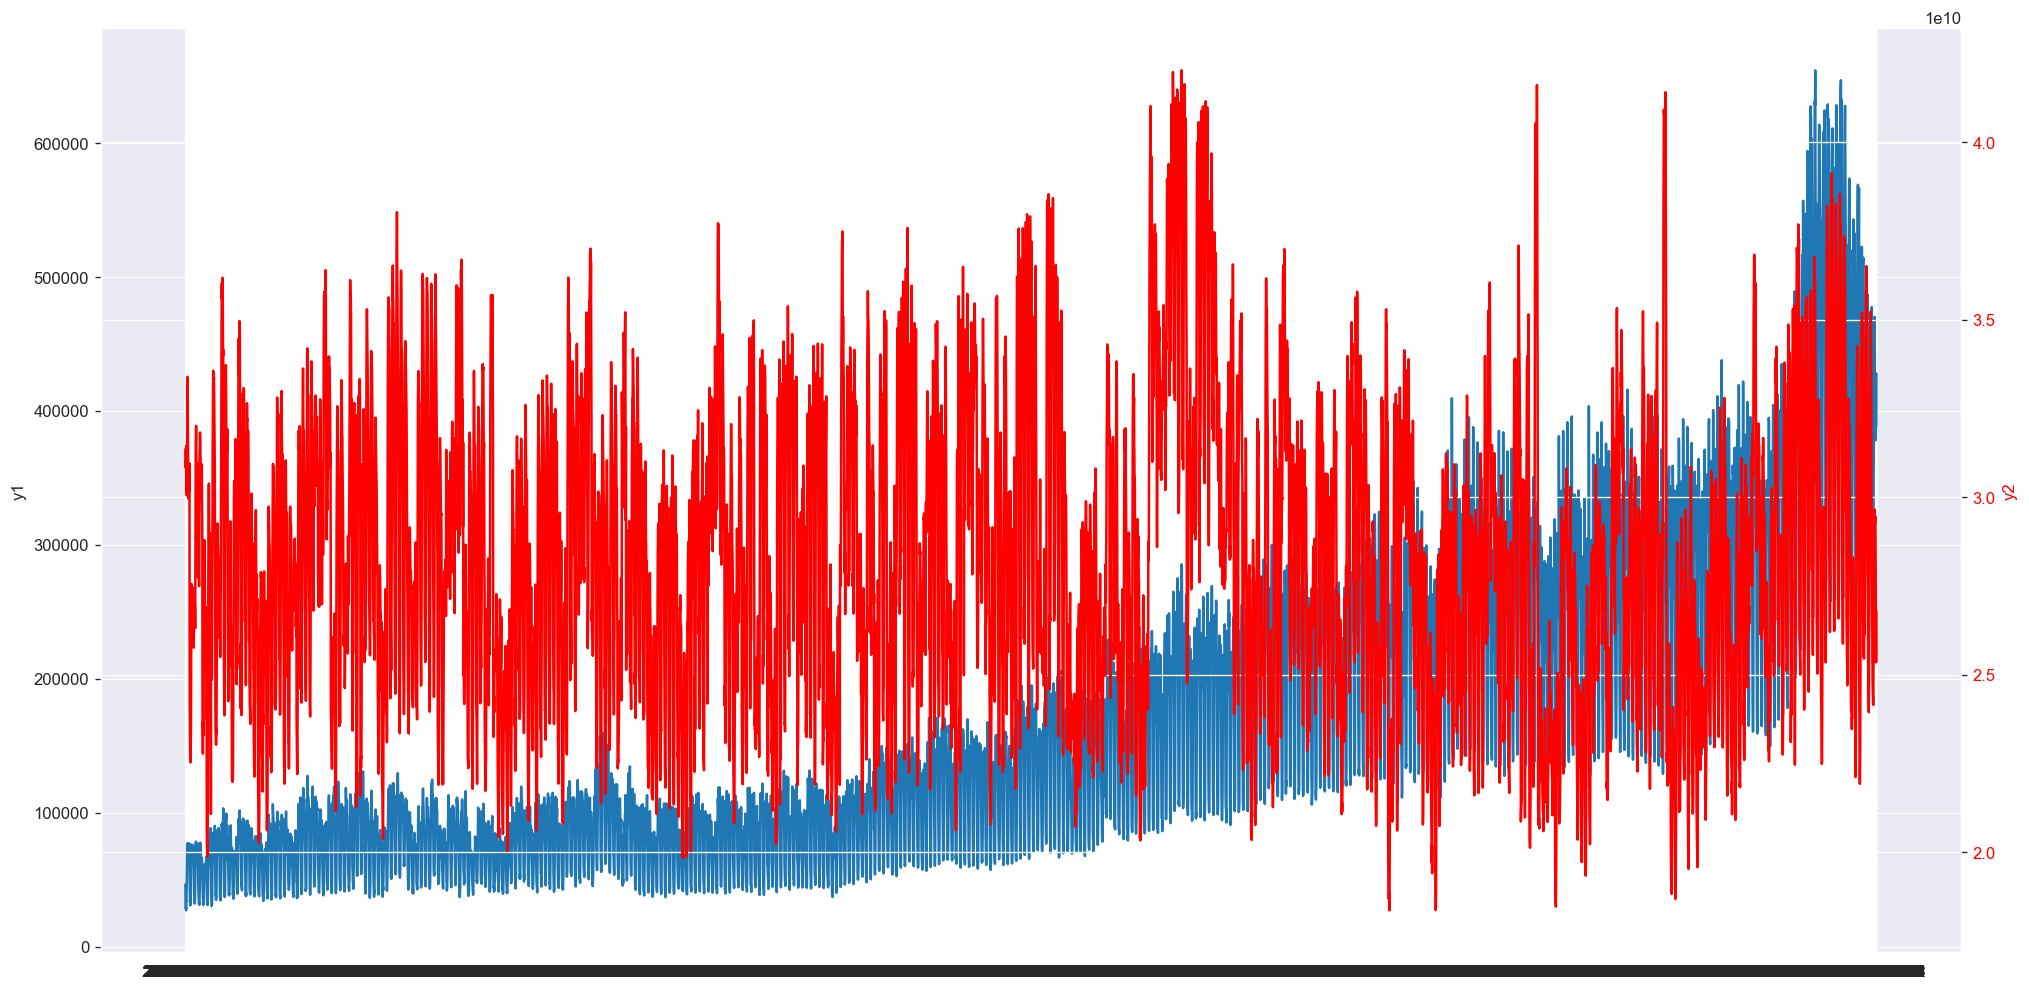

In [51]:

x = tempd["timestamp"]
y1 = tempd["Value"]
y2 = tempd["TotalEnergyGenerated_W"]

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('y1')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r-')
ax2.set_ylabel('y2', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')


In [54]:
# x = tempd["timestamp"]
# y1 = tempd["Value"]
# y2 = tempd["Price_EUR_Wh"]

# fig = plt.figure(figsize=(20, 10))
# ax1 = fig.add_subplot(111)
# ax1.plot(x, y1)
# ax1.set_ylabel('y1')

# ax2 = ax1.twinx()
# ax2.plot(x, y2, 'r-')
# ax2.set_ylabel('y2', color='r')
# for tl in ax2.get_yticklabels():
#     tl.set_color('r')

#### **DATASET MONTHLY AVG TEMPERATURE IN SPAIN**

Dataset taken from statista (then cleaned)
https://www.statista.com/statistics/802774/monthly-mean-temperature-in-spain/

##### **Importing the data**

In [55]:
   
# read csv file and convert 
# into a dataframe object

temps = pd.read_csv("./data/temps-spain-2015-2020.csv",sep=',')


##### **Cleaning the data**

In [56]:
temps["Year"] = temps['Date'].str[:4].astype("int")
temps["Month"] = temps['Date'].str[5:7].astype("int")

temps["Date"] = temps["Year"].astype("string") + "-" + temps["Month"].astype("string")

temps['Month'] = temps['Month'].astype("int")
temps.head()

,Date,Temp,Year,Month
0,2016-1,9.5,2016,1
1,2016-2,9.3,2016,2
2,2016-3,10.0,2016,3
3,2016-4,13.0,2016,4
4,2016-5,16.4,2016,5


In [57]:
tempDic = dict(zip(temps.Date, temps.Temp.astype("string")))
tempDic

{'2016-1': '9.5',
 '2016-2': '9.3',
 '2016-3': '10.0',
 '2016-4': '13.0',
 '2016-5': '16.4',
 '2016-6': '21.8',
 '2016-7': '25.5',
 '2016-8': '25.2',
 '2016-9': '22.1',
 '2016-10': '17.4',
 '2016-11': '10.8',
 '2016-12': '8.6',
 '2017-1': '6.7',
 '2017-2': '10.2',
 '2017-3': '12.2',
 '2017-4': '14.9',
 '2017-5': '19.0',
 '2017-6': '24.1',
 '2017-7': '24.9',
 '2017-8': '24.9',
 '2017-9': '20.6',
 '2017-10': '18.5',
 '2017-11': '11.0',
 '2017-12': '7.6'}

##### **Adding the avg temperature to d**

In [58]:
d["Date"] = d["Year"].astype("string") + "-" + d["Month"].astype("string")
df2 = d.copy()
df2.replace({"Date": tempDic},inplace=True)

df2["Temperatures"] = df2['Date']
df2.drop('Date', axis=1, inplace = True)
df2["Temperatures"] = df2["Temperatures"].astype("float")
d = df2.copy()
d.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9473 entries, 0 to 9478
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    9473 non-null   int64  
 1   Month                   9473 non-null   int64  
 2   Day                     9473 non-null   int64  
 3   Hour                    9473 non-null   int64  
 4   Rate                    9473 non-null   float64
 5   Value                   9473 non-null   int64  
 6   TotalEnergyGenerated_W  9473 non-null   float64
 7   Price_EUR_Wh            9473 non-null   float64
 8   Temperatures            9473 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 740.1 KB


# Deseasonalize Rate and Value

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

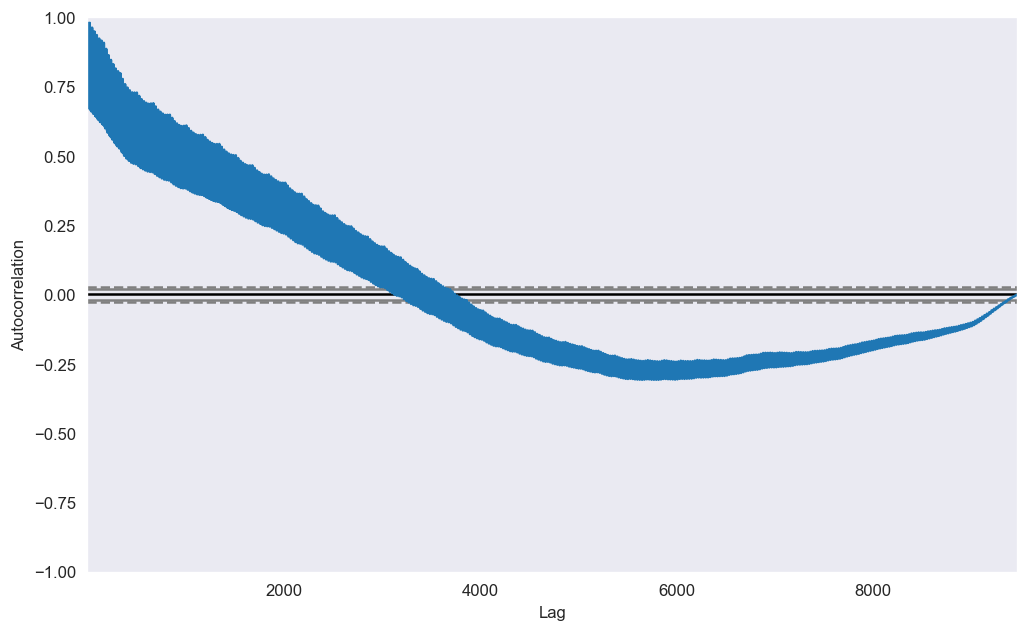

In [59]:
# Test for seasonality of Value
# This goes right after 'Adding temperature to d' markup cell
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(d['Value'].tolist())

Text(0.5, 1.0, 'Value subtracting least squares fit')

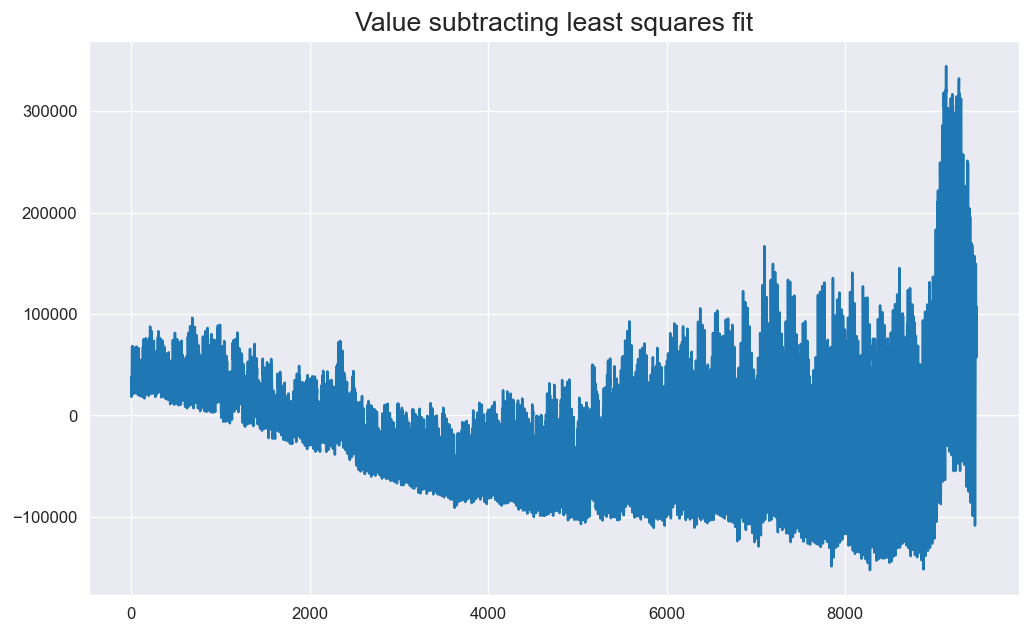

In [60]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrendedValue = signal.detrend(d['Value'].values)
plt.plot(detrendedValue)
plt.title('Value subtracting least squares fit', fontsize=16)

Text(0.5, 1.0, 'Value detrended')

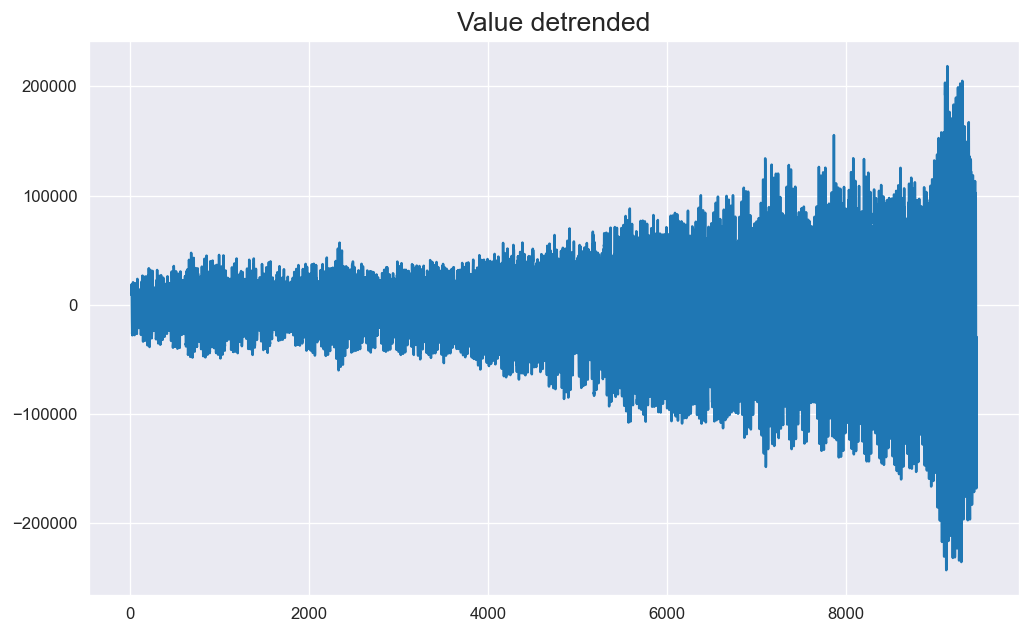

In [61]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
result_mulValue = seasonal_decompose(d['Value'], model='multiplicative', period=30)
detrendedValue = d['Value'].values - result_mulValue.trend
plt.plot(detrendedValue)
plt.title('Value detrended', fontsize=16)

[]

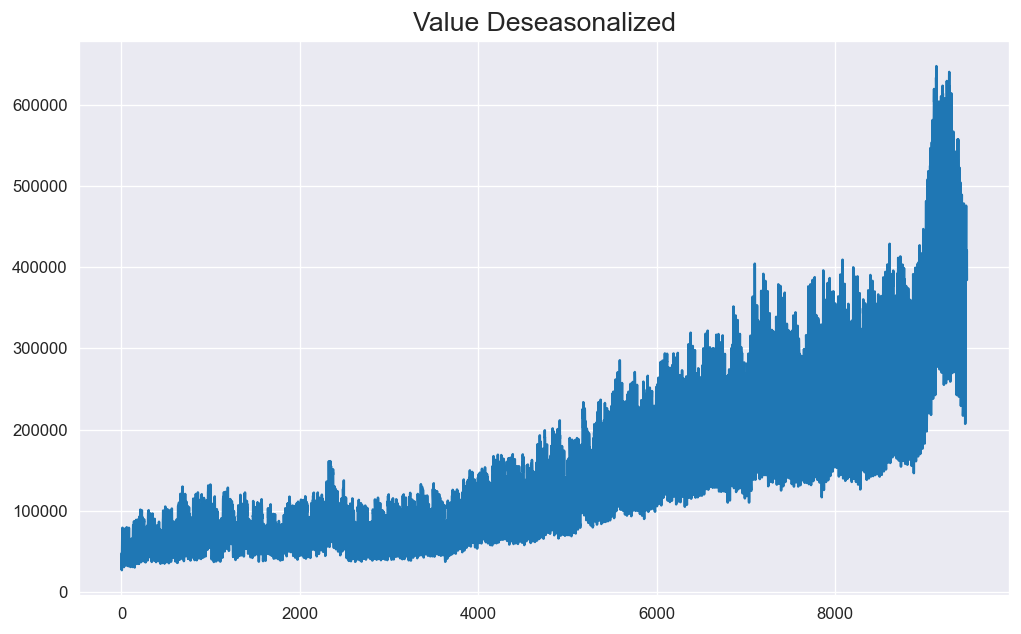

In [62]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mulValue = seasonal_decompose(d['Value'], model='multiplicative', period=30)


# Deseasonalize
deseasonalizedValue = d['Value'].values / result_mulValue.seasonal


# Plot
plt.plot(deseasonalizedValue)
plt.title('Value Deseasonalized', fontsize=16)
plt.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

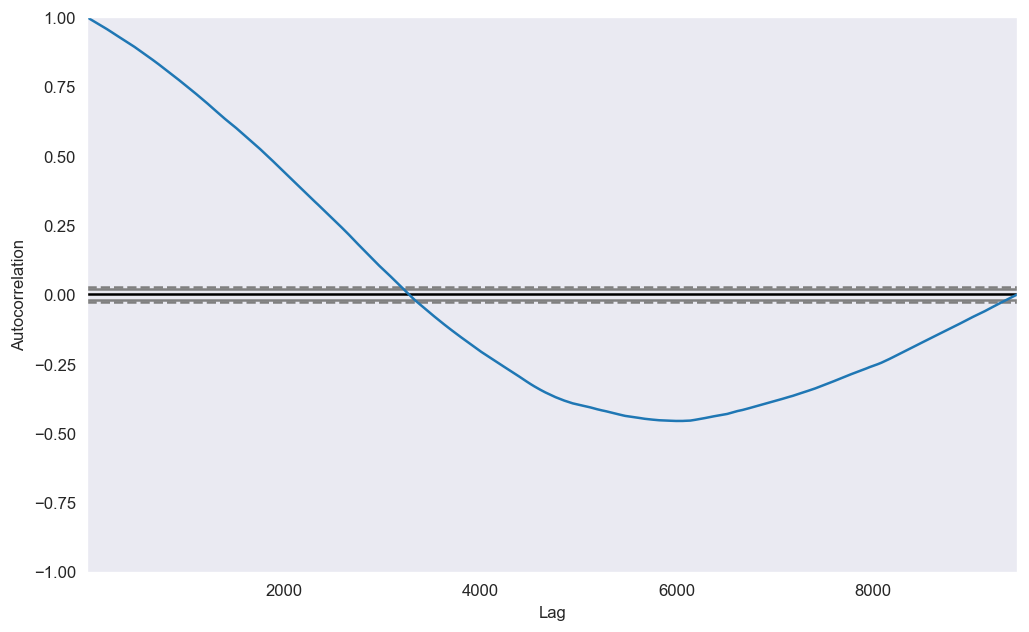

In [63]:
# Test for seasonality of Rate

# Draw Plot
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(d['Rate'].tolist())

Text(0.5, 1.0, 'Rate subtracting least squares')

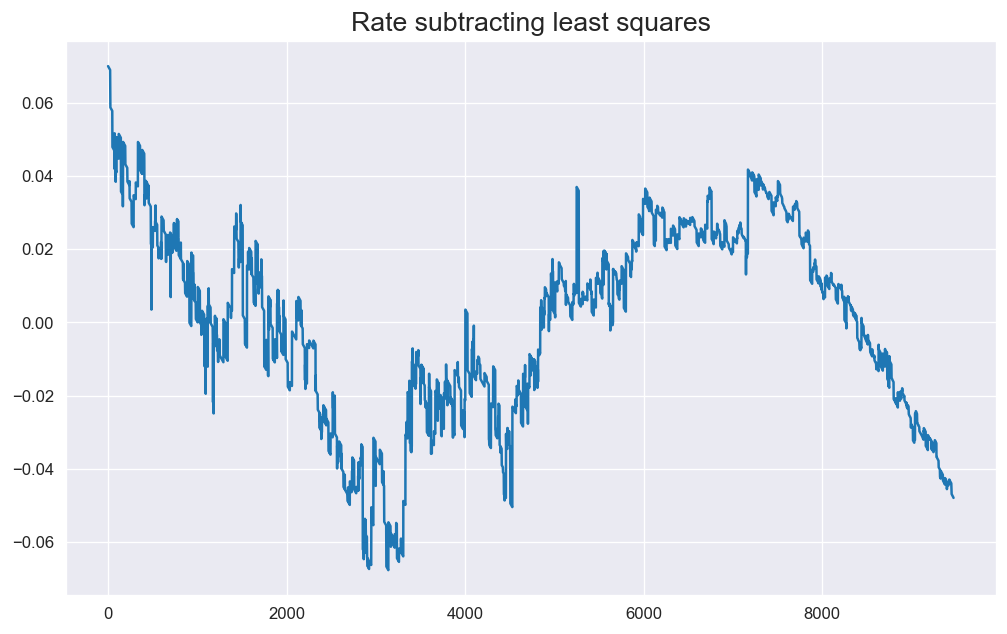

In [64]:
detrendedRate = signal.detrend(d['Rate'].values)
plt.plot(detrendedRate)
plt.title('Rate subtracting least squares', fontsize=16)

Text(0.5, 1.0, 'Rate detrended')

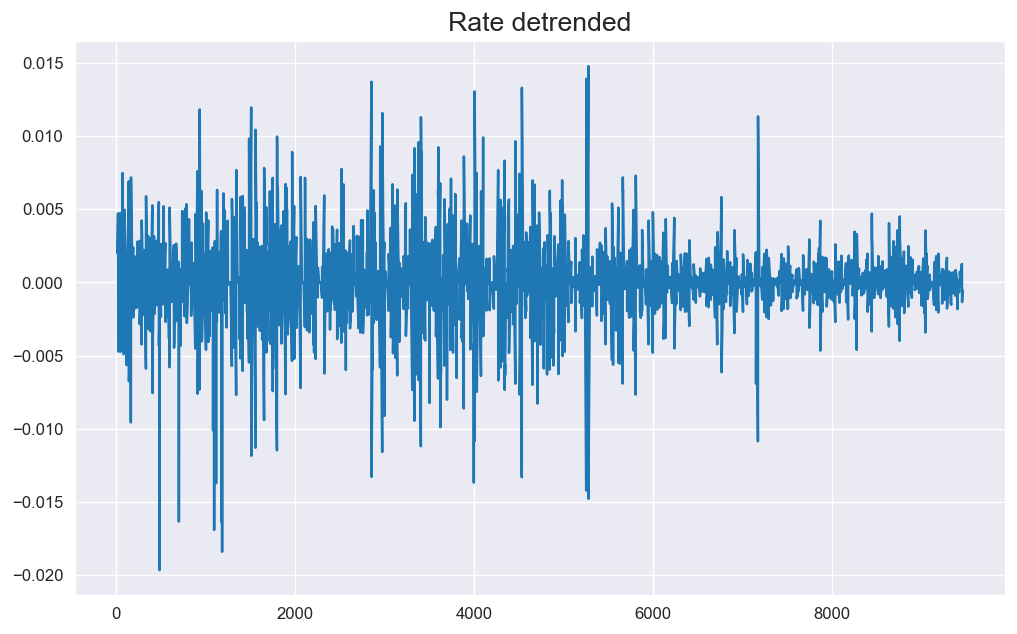

In [65]:
result_mulRate = seasonal_decompose(d['Rate'], model='multiplicative', period=30)
detrendedRate = d['Rate'].values - result_mulRate.trend
plt.plot(detrendedRate)
plt.title('Rate detrended', fontsize=16)

[]

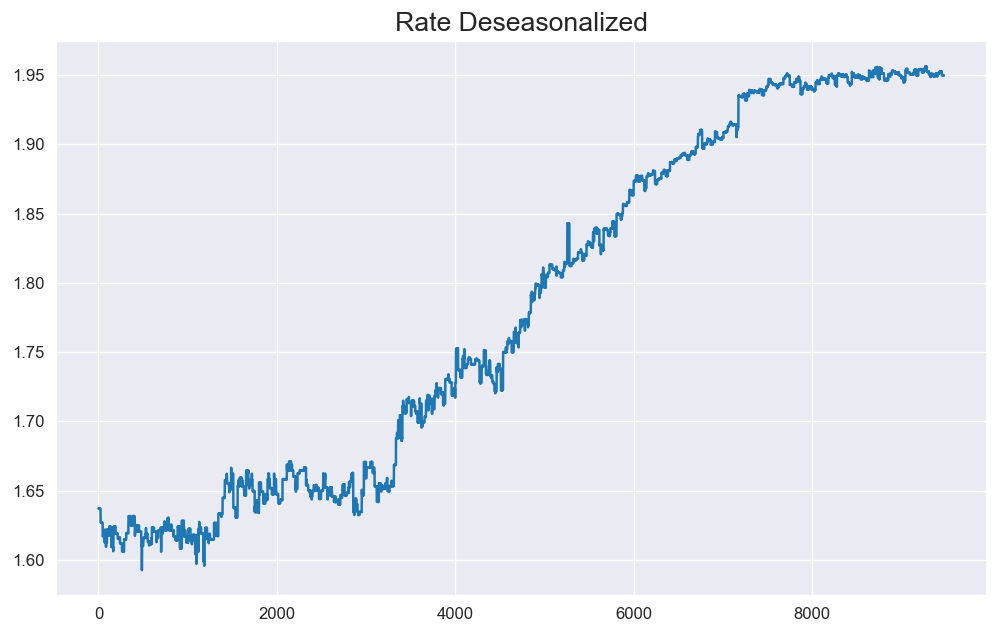

In [66]:
# Subtracting the Trend Component


# Time Series Decomposition
result_mulRate = seasonal_decompose(d['Rate'], model='multiplicative', period=30)


# Deseasonalize
deseasonalizedRate = d['Rate'].values / result_mulRate.seasonal


# Plot
plt.plot(deseasonalizedRate)
plt.title('Rate Deseasonalized', fontsize=16)
plt.plot()

In [67]:
d['DeseasonalizedRate'] = deseasonalizedRate
d['DeseasonalizedValue'] = deseasonalizedValue
d

,Year,Month,Day,Hour,Rate,Value,TotalEnergyGenerated_W,Price_EUR_Wh,Temperatures,DeseasonalizedRate,DeseasonalizedValue
0,2016,6,1,1,1.637097,46257,3.134861e+10,0.000041,21.8,1.637080,47225.589242
1,2016,6,1,2,1.637097,32488,3.116080e+10,0.000039,21.8,1.637206,32490.580311
2,2016,6,1,3,1.637097,28666,3.082493e+10,0.000036,21.8,1.637170,28148.386955
3,2016,6,1,4,1.637097,29334,3.097496e+10,0.000036,21.8,1.636997,28697.146470
4,2016,6,1,5,1.637097,27025,3.128076e+10,0.000040,21.8,1.636942,26769.197217
...,...,...,...,...,...,...,...,...,...,...,...
9474,2017,6,30,20,1.949905,377980,2.870566e+10,0.000051,24.1,1.949579,388017.906714
9475,2017,6,30,21,1.949905,388733,2.736111e+10,0.000054,24.1,1.949724,393451.055662
9476,2017,6,30,22,1.949905,419423,2.660606e+10,0.000056,24.1,1.949840,415971.029819
9477,2017,6,30,23,1.949905,427963,2.534345e+10,0.000052,24.1,1.949799,420635.514649


In [68]:
d = d.drop(columns=["Rate", "Value"])
d

,Year,Month,Day,Hour,TotalEnergyGenerated_W,Price_EUR_Wh,Temperatures,DeseasonalizedRate,DeseasonalizedValue
0,2016,6,1,1,3.134861e+10,0.000041,21.8,1.637080,47225.589242
1,2016,6,1,2,3.116080e+10,0.000039,21.8,1.637206,32490.580311
2,2016,6,1,3,3.082493e+10,0.000036,21.8,1.637170,28148.386955
3,2016,6,1,4,3.097496e+10,0.000036,21.8,1.636997,28697.146470
4,2016,6,1,5,3.128076e+10,0.000040,21.8,1.636942,26769.197217
...,...,...,...,...,...,...,...,...,...
9474,2017,6,30,20,2.870566e+10,0.000051,24.1,1.949579,388017.906714
9475,2017,6,30,21,2.736111e+10,0.000054,24.1,1.949724,393451.055662
9476,2017,6,30,22,2.660606e+10,0.000056,24.1,1.949840,415971.029819
9477,2017,6,30,23,2.534345e+10,0.000052,24.1,1.949799,420635.514649


In [69]:
d = d.copy()
print("Null values Before: \n", d.isnull().sum().sort_values(ascending=False))
d = d.dropna()
print("Null values After: \n", d.isnull().sum().sort_values(ascending=False))

Null values Before: 
 Year                      0
Month                     0
Day                       0
Hour                      0
TotalEnergyGenerated_W    0
Price_EUR_Wh              0
Temperatures              0
DeseasonalizedRate        0
DeseasonalizedValue       0
dtype: int64
Null values After: 
 Year                      0
Month                     0
Day                       0
Hour                      0
TotalEnergyGenerated_W    0
Price_EUR_Wh              0
Temperatures              0
DeseasonalizedRate        0
DeseasonalizedValue       0
dtype: int64


# Check for Skew

1.2911455825045262

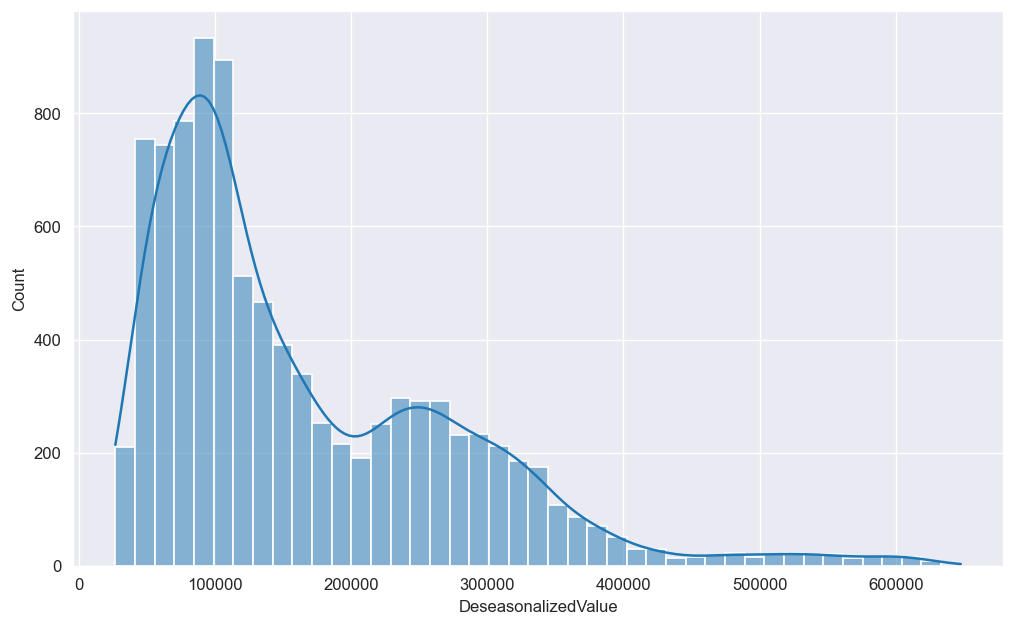

In [70]:
sns.histplot(d['DeseasonalizedValue'],kde=True)
#d['Value'].hist()
d['DeseasonalizedValue'].skew()

0.06616508620066933

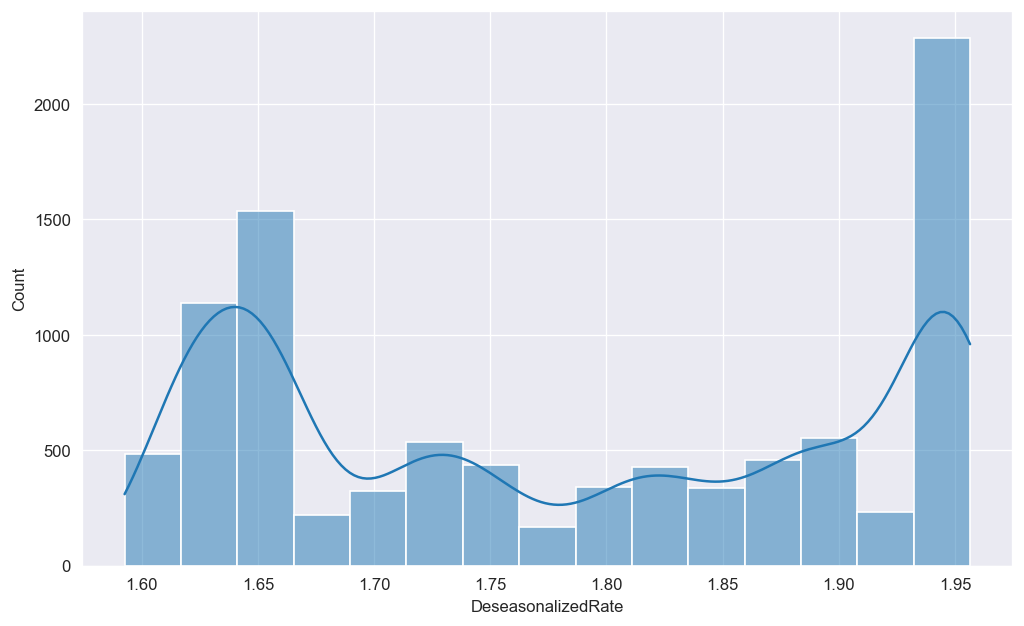

In [71]:
sns.histplot(d['DeseasonalizedRate'],kde=True)
#d['Value'].hist()
d['DeseasonalizedRate'].skew()

0.32418900870133377

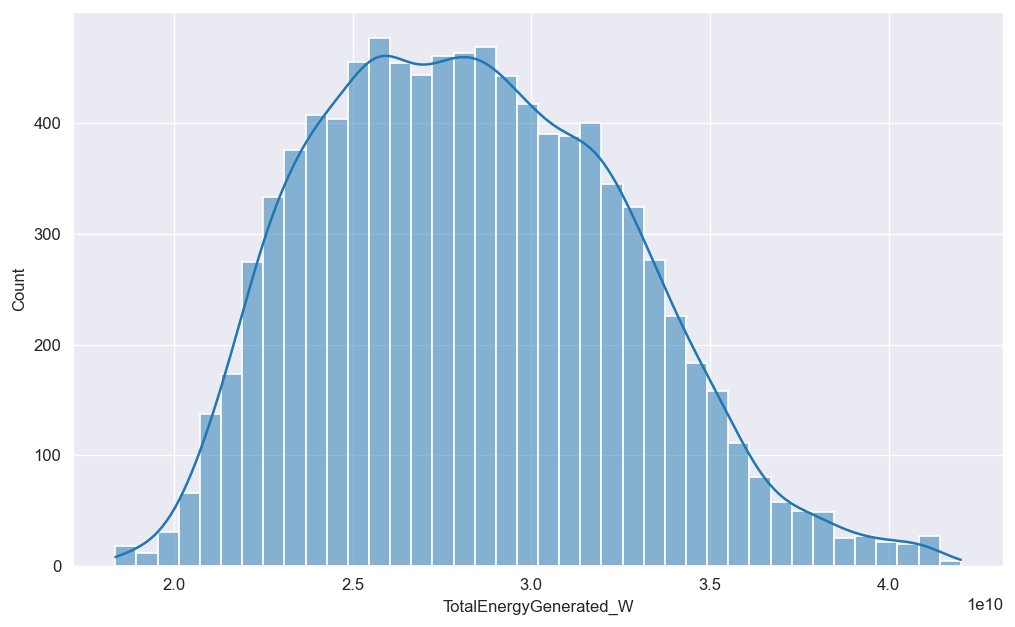

In [72]:
sns.histplot(d['TotalEnergyGenerated_W'],kde=True)
#d['Value'].hist()
d['TotalEnergyGenerated_W'].skew()

0.9915579221038273

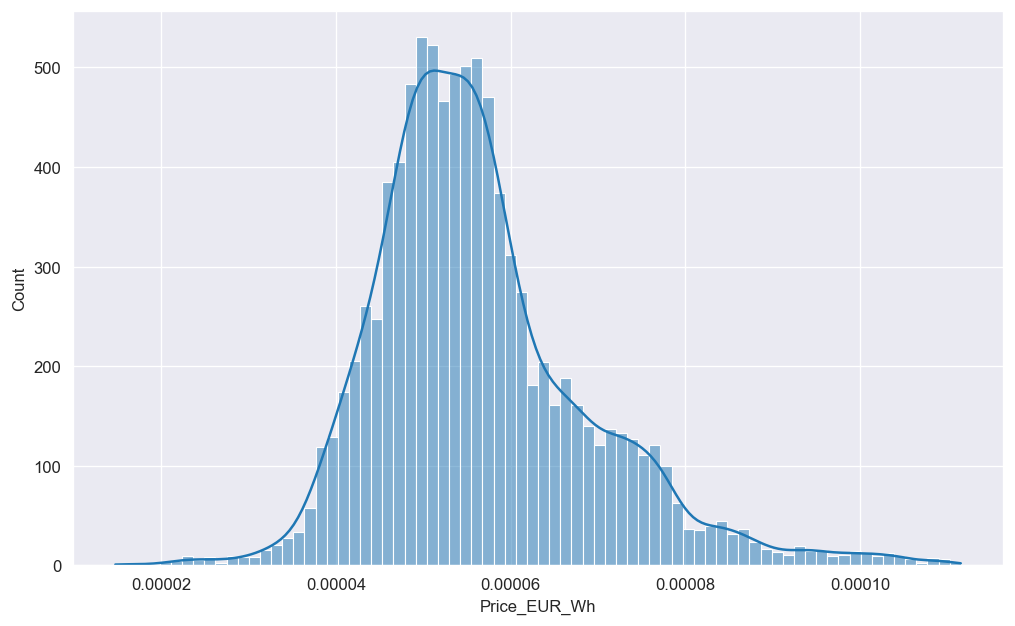

In [73]:
sns.histplot(d['Price_EUR_Wh'],kde=True)
#d['Value'].hist()
d['Price_EUR_Wh'].skew()

# **REGRESSION MODELS**

In [74]:
cld = d.copy()
print("Null values: \n", cld.isnull().sum().sort_values(ascending=False))
cld = cld.dropna()
print("Null values: \n", cld.isnull().sum().sort_values(ascending=False))

Null values: 
 Year                      0
Month                     0
Day                       0
Hour                      0
TotalEnergyGenerated_W    0
Price_EUR_Wh              0
Temperatures              0
DeseasonalizedRate        0
DeseasonalizedValue       0
dtype: int64
Null values: 
 Year                      0
Month                     0
Day                       0
Hour                      0
TotalEnergyGenerated_W    0
Price_EUR_Wh              0
Temperatures              0
DeseasonalizedRate        0
DeseasonalizedValue       0
dtype: int64


#### **Finding the trendiline for rate for the future prediction**

In [75]:
# Predicting Rate using DeseasonalizedRate
X = cld.copy()
Y = cld['DeseasonalizedRate'] # From 'Rate' to 'DeseasonalizedRate'
X = X.drop(columns=["TotalEnergyGenerated_W","Price_EUR_Wh", "DeseasonalizedValue", "DeseasonalizedRate"], axis=1)# From 'Rate' and 'Value' to 'DeseasonalizedRate/Value'
print(X.columns)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=42, shuffle=True)

Rate_Linear_Regression_Model = LinearRegression()

scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error',
           'r2':'r2',
           }
scores = cross_validate(Rate_Linear_Regression_Model, X, Y, scoring=scoring,  cv=KFold(n_splits = 5, shuffle=True))


Rate_Linear_Regression_Model.fit(trainX, trainY)
predY = Rate_Linear_Regression_Model.predict(testX)


print("Linear Regression Results Rate-------------------------")
print("Scores: ",scores)
print("R2 score: ",r2_score(testY, predY))
print("mean_absolute_percentage_error", mean_absolute_percentage_error(testY, predY))

Index(['Year', 'Month', 'Day', 'Hour', 'Temperatures'], dtype='object')
Linear Regression Results Rate-------------------------
Scores:  {'fit_time': array([0.        , 0.        , 0.01562738, 0.        , 0.        ]), 'score_time': array([0.01562715, 0.        , 0.        , 0.        , 0.        ]), 'test_abs_error': array([-0.01523067, -0.0152841 , -0.01549413, -0.01470948, -0.01465736]), 'test_squared_error': array([-0.00038146, -0.00038292, -0.00038876, -0.00036012, -0.00035646]), 'test_r2': array([0.97591819, 0.97727358, 0.97576457, 0.9776432 , 0.97785515])}
R2 score:  0.9753335294319636
mean_absolute_percentage_error 0.00879158992343879


In [76]:

X = cld.copy()
Y = cld['DeseasonalizedRate']
X = X.drop(columns=["TotalEnergyGenerated_W","Price_EUR_Wh", "DeseasonalizedValue", "DeseasonalizedRate"], axis=1)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=42, shuffle=True)

Rate_GradBoost_Regression_Model = GradientBoostingRegressor()

scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error',
           'r2':'r2',
           }
scores = cross_validate(Rate_GradBoost_Regression_Model, X, Y, scoring=scoring,  cv=KFold(n_splits = 5, shuffle=True))


Rate_GradBoost_Regression_Model.fit(trainX, trainY)
predY = Rate_GradBoost_Regression_Model.predict(testX)


print("Gradient Boosting Regression Results Rate-------------------------")
print("Scores: ",scores)
print("R2 score: ",r2_score(testY, predY))
print("mean_absolute_percentage_error", mean_absolute_percentage_error(testY, predY))

Gradient Boosting Regression Results Rate-------------------------
Scores:  {'fit_time': array([0.41666222, 0.57444239, 0.46153474, 0.47021675, 0.6132381 ]), 'score_time': array([0.        , 0.00404787, 0.00539541, 0.        , 0.        ]), 'test_abs_error': array([-0.00429592, -0.00438262, -0.00438852, -0.00444986, -0.0044975 ]), 'test_squared_error': array([-3.41330657e-05, -3.64273288e-05, -3.62485025e-05, -3.59035901e-05,
       -3.69458436e-05]), 'test_r2': array([0.99787845, 0.99772424, 0.99775108, 0.99784753, 0.99769613])}
R2 score:  0.9976784255773086
mean_absolute_percentage_error 0.0025466394147376833


#### **Building the model for consumption**

In [77]:
cld = d.copy()
print("Null values Before: \n", cld.isnull().sum().sort_values(ascending=False))
cld = cld.dropna()
print("Null values After: \n", cld.isnull().sum().sort_values(ascending=False))

Null values Before: 
 Year                      0
Month                     0
Day                       0
Hour                      0
TotalEnergyGenerated_W    0
Price_EUR_Wh              0
Temperatures              0
DeseasonalizedRate        0
DeseasonalizedValue       0
dtype: int64
Null values After: 
 Year                      0
Month                     0
Day                       0
Hour                      0
TotalEnergyGenerated_W    0
Price_EUR_Wh              0
Temperatures              0
DeseasonalizedRate        0
DeseasonalizedValue       0
dtype: int64


In [78]:
X = cld.copy()
Y = cld['DeseasonalizedValue']
#X = X.drop(['Value', "CUPS_x_day", "TotalEnergyGenerated_W", "Price_EUR_Wh"], axis=1)
X = X.drop(['DeseasonalizedValue'], axis=1)
print(X.columns)

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=42, shuffle=True)


GradientBoostingModel = GradientBoostingRegressor()

scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error',
           'r2':'r2',
           }
scores = cross_validate(GradientBoostingModel, X, Y, scoring=scoring, cv=KFold(n_splits = 5, shuffle=True))


GradientBoostingModel.fit(trainX, trainY)
predY = GradientBoostingModel.predict(testX)

print("Gradient Boosting Results -------------------------")
print("Scores: ",scores)
print("R2 score: ",r2_score(testY, predY))
print("mean_absolute_percentage_error", mean_absolute_percentage_error(testY, predY))

Index(['Year', 'Month', 'Day', 'Hour', 'TotalEnergyGenerated_W',
       'Price_EUR_Wh', 'Temperatures', 'DeseasonalizedRate'],
      dtype='object')
Gradient Boosting Results -------------------------
Scores:  {'fit_time': array([2.13020611, 1.58020592, 1.4086833 , 1.72463751, 1.68544388]), 'score_time': array([0.        , 0.01610279, 0.        , 0.        , 0.        ]), 'test_abs_error': array([-12742.20162092, -13855.26228986, -13221.00020391, -13205.3623612 ,
       -13291.99969491]), 'test_squared_error': array([-3.56149269e+08, -4.18460340e+08, -3.66028793e+08, -3.65055639e+08,
       -3.67605009e+08]), 'test_r2': array([0.97185866, 0.96514661, 0.96899246, 0.97035708, 0.97111769])}
R2 score:  0.9664524078882806
mean_absolute_percentage_error 0.0892001597790551


In [79]:
X = cld.copy()
Y = cld['DeseasonalizedValue']
#X = X.drop(['Value', "CUPS_x_day", "TotalEnergyGenerated_W", "Price_EUR_Wh"], axis=1)
X = X.drop(['DeseasonalizedValue'], axis=1)

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=42, shuffle=True)
print(X.columns)


RandomForestModel = RandomForestRegressor()

scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error',
           'r2':'r2',
           }
scores = cross_validate(RandomForestModel, X, Y, scoring=scoring, cv=KFold(n_splits = 5, shuffle=True))


RandomForestModel.fit(trainX, trainY)
predY = RandomForestModel.predict(testX)

print("Random Forest Results -------------------------")
print("Scores: ",scores)
print("R2 score: ",r2_score(testY, predY))
print("mean_absolute_percentage_error", mean_absolute_percentage_error(testY, predY))

Index(['Year', 'Month', 'Day', 'Hour', 'TotalEnergyGenerated_W',
       'Price_EUR_Wh', 'Temperatures', 'DeseasonalizedRate'],
      dtype='object')
Random Forest Results -------------------------
Scores:  {'fit_time': array([4.58830953, 5.65249658, 4.93707204, 4.6955111 , 4.45868778]), 'score_time': array([0.05534506, 0.05372357, 0.0533998 , 0.04225516, 0.04708457]), 'test_abs_error': array([-8351.10835291, -8497.44303579, -8458.62306008, -8553.71930229,
       -7942.34294806]), 'test_squared_error': array([-1.45667728e+08, -1.53382429e+08, -1.56265082e+08, -1.56452713e+08,
       -1.34643005e+08]), 'test_r2': array([0.98869152, 0.98732081, 0.98704952, 0.9874927 , 0.98875794])}
R2 score:  0.9869576803375358
mean_absolute_percentage_error 0.05848397248486235


In [80]:

X = cld.copy()
Y = cld['DeseasonalizedValue']
#X = X.drop(['Value', "CUPS_x_day", "TotalEnergyGenerated_W", "Price_EUR_Wh"], axis=1)
X = X.drop(['DeseasonalizedValue'], axis=1)

trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state=42, shuffle=True)
print(X.columns)


RidgeRegressionModel = Ridge()

scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error',
           'r2':'r2',
           }
scores = cross_validate(RidgeRegressionModel, X, Y, scoring=scoring, cv=KFold(n_splits = 5, shuffle=True))


RidgeRegressionModel.fit(trainX, trainY)
predY = RidgeRegressionModel.predict(testX)

print("Ridge Regression Results -------------------------")
print("Scores: ",scores)
print("R2 score: ",r2_score(testY, predY))
print("mean_absolute_percentage_error", mean_absolute_percentage_error(testY, predY))

Index(['Year', 'Month', 'Day', 'Hour', 'TotalEnergyGenerated_W',
       'Price_EUR_Wh', 'Temperatures', 'DeseasonalizedRate'],
      dtype='object')
Ridge Regression Results -------------------------
Scores:  {'fit_time': array([0.0296979 , 0.01561975, 0.        , 0.        , 0.        ]), 'score_time': array([0.        , 0.        , 0.        , 0.01563358, 0.        ]), 'test_abs_error': array([-31713.64262077, -31915.14605428, -32420.53262377, -31346.42689059,
       -32719.44137963]), 'test_squared_error': array([-1.98107753e+09, -1.95590872e+09, -1.96183462e+09, -1.81646033e+09,
       -2.05721037e+09]), 'test_r2': array([0.84468464, 0.83556784, 0.8417327 , 0.84741147, 0.83638512])}
R2 score:  0.835281681461923
mean_absolute_percentage_error 0.26739922633362767


C:\Users\lucac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.23792e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\lucac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.24288e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\lucac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.28175e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\lucac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.288e-24): result may not be accurate.
  return linalg.solve(A

# **Deliverable**

##### **Creating the deliverable**

In [81]:
# Range of dates of the deliverable
sdate = date(2017,8,1) 
edate = date(2017,11,2)

# For testing purposes comment out if not testing ---------------
#sdate = date(2017,3,1) 
#edate = date(2017,7,1)
# ---------------------------------------------------------------

# Creating a range of dates from 2017-8-1 to 2017-11-1 with a hourly frequency
dates= pd.date_range(sdate,edate-timedelta(days=1),freq='H')

# Creating a dataframe that contains the dates, this will be the dataframe returned
deliverable = pd.DataFrame(columns= ["Date"])
deliverable["Date"] = dates

# Transforming the dates into the columns YEAR, MONTH, DAY, Hour
deliverable['Date'] = deliverable['Date'].astype("string")
deliverable["Year"] = deliverable['Date'].str[:4]
deliverable["Month"] = deliverable['Date'].str[5:7]
deliverable["Day"] = deliverable['Date'].str[8:10]
deliverable["Hour"] = deliverable['Date'].str[11:13]

# Tranforming the data elements into integers
deliverable['Month'] = deliverable['Month'].astype("int")
deliverable['Day'] = deliverable['Day'].astype("int")
deliverable['Year'] = deliverable['Year'].astype("int")
deliverable['Hour'] = deliverable['Hour'].astype("int")

# Changing hour = 0 to hour = 24 to match the same hour format of the Consumptions.csv
deliverable['Hour'].mask(deliverable['Hour'] == 0, 24, inplace=True)

# dropping the Date column
deliverable = deliverable.drop(columns=["Date"])

print(deliverable.describe())
print(deliverable)

         Year        Month          Day         Hour
count  2209.0  2209.000000  2209.000000  2209.000000
mean   2017.0     9.000905    15.830240    12.505206
std       0.0     0.822024     8.859852     6.926510
min    2017.0     8.000000     1.000000     1.000000
25%    2017.0     8.000000     8.000000     7.000000
50%    2017.0     9.000000    16.000000    13.000000
75%    2017.0    10.000000    23.000000    19.000000
max    2017.0    11.000000    31.000000    24.000000
      Year  Month  Day  Hour
0     2017      8    1    24
1     2017      8    1     1
2     2017      8    1     2
3     2017      8    1     3
4     2017      8    1     4
...    ...    ...  ...   ...
2204  2017     10   31    20
2205  2017     10   31    21
2206  2017     10   31    22
2207  2017     10   31    23
2208  2017     11    1    24

[2209 rows x 4 columns]


#### **Adding available data to the deliverable**
These include the temperature and total energy produced and the prediction for Rate

##### **Adding temp to the deliverable**

In [82]:
deliverable["Date"] = deliverable["Year"].astype("string") + "-" + deliverable["Month"].astype("string")


df2 = deliverable.copy()
df2.replace({"Date": tempDic},inplace=True)

df2["Temperatures"] = df2['Date']
df2.drop('Date', axis=1, inplace = True)
df2["Temperatures"] = df2["Temperatures"].astype("float")

deliverable = df2.copy()
deliverable

,Year,Month,Day,Hour,Temperatures
0,2017,8,1,24,24.9
1,2017,8,1,1,24.9
2,2017,8,1,2,24.9
3,2017,8,1,3,24.9
4,2017,8,1,4,24.9
...,...,...,...,...,...
2204,2017,10,31,20,18.5
2205,2017,10,31,21,18.5
2206,2017,10,31,22,18.5
2207,2017,10,31,23,18.5


##### **Adding Rate to the deliverable**

In [83]:
RatePrediciton = Rate_GradBoost_Regression_Model.predict(deliverable)
RatePrediciton

array([1.94979474, 1.94996344, 1.94996344, ..., 1.95474931, 1.95474931,
       1.88818765])

In [84]:
deliverable["DeseasonalizedRate"] = RatePrediciton
print(deliverable.columns)
new_cols = ['Year', 'Month', 'Day', 'Hour',  'DeseasonalizedRate', 'Temperatures',]
deliverable=deliverable.reindex(columns=new_cols) 
deliverable



Index(['Year', 'Month', 'Day', 'Hour', 'Temperatures', 'DeseasonalizedRate'], dtype='object')


,Year,Month,Day,Hour,DeseasonalizedRate,Temperatures
0,2017,8,1,24,1.949795,24.9
1,2017,8,1,1,1.949963,24.9
2,2017,8,1,2,1.949963,24.9
3,2017,8,1,3,1.949963,24.9
4,2017,8,1,4,1.949963,24.9
...,...,...,...,...,...,...
2204,2017,10,31,20,1.954749,18.5
2205,2017,10,31,21,1.954749,18.5
2206,2017,10,31,22,1.954749,18.5
2207,2017,10,31,23,1.954749,18.5


In [85]:
# Seeing how good is the rate prediction compared to the past data
df2 = d.copy()
df3 = deliverable.copy()

df2 = df2.drop(columns=[ "Temperatures", "TotalEnergyGenerated_W", "Price_EUR_Wh", "DeseasonalizedValue"])
df3 = df3.drop(columns=[ "Temperatures"])
#df3.rename(columns = {'Rate_Prediction':'Rate'}, inplace = True)
df2 = df2.append(df3)

df2["Date"] = df2["Year"].astype("string") + "-" + df2["Month"].astype("string") + "-" + df2["Day"].astype("string") + "-" + df2["Hour"] .astype("string")

df2.head()

C:\Users\lucac\AppData\Local\Temp\ipykernel_18996\4140476280.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3)


,Year,Month,Day,Hour,DeseasonalizedRate,Date
0,2016,6,1,1,1.637080,2016-6-1-1
1,2016,6,1,2,1.637206,2016-6-1-2
2,2016,6,1,3,1.637170,2016-6-1-3
3,2016,6,1,4,1.636997,2016-6-1-4
4,2016,6,1,5,1.636942,2016-6-1-5


In [86]:
#plt.plot(df2["Date"], df2['Rate'])
#plt.title('Test')
#plt.xlabel('Date')
#plt.ylabel('Rate')
#plt.show()

In [87]:

# Further observations
for index, row in df2.iterrows():
    print("Date ", row["Date"], "DeseasonalizedRate", row["DeseasonalizedRate"])


Date  2016-6-1-1 DeseasonalizedRate 1.6370795729277796
Date  2016-6-1-2 DeseasonalizedRate 1.6372055943084816
Date  2016-6-1-3 DeseasonalizedRate 1.637170129089905
Date  2016-6-1-4 DeseasonalizedRate 1.6369970080785916
Date  2016-6-1-5 DeseasonalizedRate 1.6369416039279074
Date  2016-6-1-6 DeseasonalizedRate 1.6369093791138616
Date  2016-6-1-7 DeseasonalizedRate 1.637165378190982
Date  2016-6-1-8 DeseasonalizedRate 1.637045195434054
Date  2016-6-1-9 DeseasonalizedRate 1.6370572041202869
Date  2016-6-1-10 DeseasonalizedRate 1.6371933251775799
Date  2016-6-1-11 DeseasonalizedRate 1.6371727478777949
Date  2016-6-1-12 DeseasonalizedRate 1.63724268866178
Date  2016-6-1-13 DeseasonalizedRate 1.6371667565537023
Date  2016-6-1-14 DeseasonalizedRate 1.6370164245229986
Date  2016-6-1-15 DeseasonalizedRate 1.6370376738257935
Date  2016-6-1-16 DeseasonalizedRate 1.6369834809281518
Date  2016-6-1-17 DeseasonalizedRate 1.6370429318737463
Date  2016-6-1-18 DeseasonalizedRate 1.6370116499611784
Date  

In [88]:
""" 
plt.plot(df2["Date"], df2['CUPS_x_day'])
plt.title('CUPS_x_day')
plt.xlabel('Date')
plt.ylabel('CUPS_x_day')
plt.show() 
"""

' \nplt.plot(df2["Date"], df2[\'CUPS_x_day\'])\nplt.title(\'CUPS_x_day\')\nplt.xlabel(\'Date\')\nplt.ylabel(\'CUPS_x_day\')\nplt.show() \n'

##### **Adding Energy Generated and the price x MWhh to the deliverable**

In [89]:
deliverable

,Year,Month,Day,Hour,DeseasonalizedRate,Temperatures
0,2017,8,1,24,1.949795,24.9
1,2017,8,1,1,1.949963,24.9
2,2017,8,1,2,1.949963,24.9
3,2017,8,1,3,1.949963,24.9
4,2017,8,1,4,1.949963,24.9
...,...,...,...,...,...,...
2204,2017,10,31,20,1.954749,18.5
2205,2017,10,31,21,1.954749,18.5
2206,2017,10,31,22,1.954749,18.5
2207,2017,10,31,23,1.954749,18.5


In [90]:
tempDeliverable = deliverable.copy()
tempEnergy = clean_energy.copy()
print(tempEnergy.head())

tempDeliverable = tempDeliverable.drop(columns=["Temperatures", "DeseasonalizedRate"])

tempDeliverable["timestamp"] = tempDeliverable["Year"].astype("string") + "-" + tempDeliverable["Month"].astype("string") + "-" + tempDeliverable["Day"].astype("string") + "-" + tempDeliverable["Hour"] .astype("string")
tempEnergy["timestamp"] = tempEnergy["Year"].astype("string") + "-" + tempEnergy["Month"].astype("string") + "-" + tempEnergy["Day"].astype("string") + "-" + tempEnergy["Hour"].astype("string") 

Price_EUR_MWh = []
TotalEnergyGenerated_MW = []


tempd["TotalEnergyGenerated_MW"] = np.nan
tempd["Price_EUR_MWh"] = np.nan
for energy_index, energy_time in enumerate(tempEnergy["timestamp"]):
    tempDeliverable.loc[tempDeliverable.timestamp == energy_time, ["TotalEnergyGenerated_W"] ] = tempEnergy["TotalEnergyGenerated_MW"].values[energy_index]
    tempDeliverable.loc[tempDeliverable.timestamp == energy_time, ["Price_EUR_Wh"] ] = tempEnergy["Price_EUR_MWh"].values[energy_index]


deliverable["TotalEnergyGenerated_W"] = tempDeliverable["TotalEnergyGenerated_W"]*(1000000)
deliverable["Price_EUR_Wh"] = tempDeliverable["Price_EUR_Wh"]*(1/1000000)

deliverable


       TotalEnergyGenerated_MW  Price_EUR_MWh  Year  Month  Day  Hour
12407                  30850.0          45.34  2016      6    1    24
12408                  31420.0          41.00  2016      6    1     1
12409                  31343.0          39.32  2016      6    1     2
12410                  31108.0          35.76  2016      6    1     3
12411                  31176.0          35.92  2016      6    1     4


,Year,Month,Day,Hour,DeseasonalizedRate,Temperatures,TotalEnergyGenerated_W,Price_EUR_Wh
0,2017,8,1,24,1.949795,24.9,2.534300e+10,0.000056
1,2017,8,1,1,1.949963,24.9,2.360000e+10,0.000052
2,2017,8,1,2,1.949963,24.9,2.333600e+10,0.000049
3,2017,8,1,3,1.949963,24.9,2.388800e+10,0.000048
4,2017,8,1,4,1.949963,24.9,2.446700e+10,0.000048
...,...,...,...,...,...,...,...,...
2204,2017,10,31,20,1.954749,18.5,3.418400e+10,0.000080
2205,2017,10,31,21,1.954749,18.5,2.936400e+10,0.000069
2206,2017,10,31,22,1.954749,18.5,2.697500e+10,0.000062
2207,2017,10,31,23,1.954749,18.5,2.608400e+10,0.000057


## **Value prediction**

In [91]:
#deliverable = deliverable.drop(columns=["CUPS_x_day", "TotalEnergyGenerated_W", "Price_EUR_Wh"])


print(deliverable.columns)
new_cols = ['Year', 'Month', 'Day', 'Hour', 'TotalEnergyGenerated_W','Price_EUR_Wh', 'Temperatures', 'DeseasonalizedRate']
deliverable=deliverable.reindex(columns=new_cols) 
deliverable

Index(['Year', 'Month', 'Day', 'Hour', 'DeseasonalizedRate', 'Temperatures',
       'TotalEnergyGenerated_W', 'Price_EUR_Wh'],
      dtype='object')


,Year,Month,Day,Hour,TotalEnergyGenerated_W,Price_EUR_Wh,Temperatures,DeseasonalizedRate
0,2017,8,1,24,2.534300e+10,0.000056,24.9,1.949795
1,2017,8,1,1,2.360000e+10,0.000052,24.9,1.949963
2,2017,8,1,2,2.333600e+10,0.000049,24.9,1.949963
3,2017,8,1,3,2.388800e+10,0.000048,24.9,1.949963
4,2017,8,1,4,2.446700e+10,0.000048,24.9,1.949963
...,...,...,...,...,...,...,...,...
2204,2017,10,31,20,3.418400e+10,0.000080,18.5,1.954749
2205,2017,10,31,21,2.936400e+10,0.000069,18.5,1.954749
2206,2017,10,31,22,2.697500e+10,0.000062,18.5,1.954749
2207,2017,10,31,23,2.608400e+10,0.000057,18.5,1.954749


In [92]:
ValuePrediction = RidgeRegressionModel.predict(deliverable)
ValuePrediction


array([397360.93949372, 300265.48603308, 302734.03164291, ...,
       432185.42591971, 431416.08928502, 398203.04338902])

In [93]:
deliverable["DeseasonalizedValue"] = ValuePrediction
deliverable

,Year,Month,Day,Hour,TotalEnergyGenerated_W,Price_EUR_Wh,Temperatures,DeseasonalizedRate,DeseasonalizedValue
0,2017,8,1,24,2.534300e+10,0.000056,24.9,1.949795,397360.939494
1,2017,8,1,1,2.360000e+10,0.000052,24.9,1.949963,300265.486033
2,2017,8,1,2,2.333600e+10,0.000049,24.9,1.949963,302734.031643
3,2017,8,1,3,2.388800e+10,0.000048,24.9,1.949963,309416.471758
4,2017,8,1,4,2.446700e+10,0.000048,24.9,1.949963,316238.342632
...,...,...,...,...,...,...,...,...,...
2204,2017,10,31,20,3.418400e+10,0.000080,18.5,1.954749,461749.594393
2205,2017,10,31,21,2.936400e+10,0.000069,18.5,1.954749,440690.563532
2206,2017,10,31,22,2.697500e+10,0.000062,18.5,1.954749,432185.425920
2207,2017,10,31,23,2.608400e+10,0.000057,18.5,1.954749,431416.089285


In [94]:
# Seeing how good is the value prediction compared to the past data
df2 = d.copy().reset_index(drop=True)
#df2 = df2.drop(columns=["CUPS_x_day"])
df3 = deliverable.copy().reset_index(drop=True)

#df2 = df2.drop(columns=[ "Temperatures", "TotalEnergyGenerated_W", "Price_EUR_Wh", "Rate", ])
#df3 = df3.drop(columns=[ "Temperatures", "Rate", "TotalEnergyGenerated_W", "Price_EUR_Wh",])
#df3.rename(columns = {'Value_Prediciton':'Value'}, inplace = True)
df2 = df2.append(df3).reset_index(drop=True)

df2["Date"] = df2["Year"].astype("string") + "-" + df2["Month"].astype("string") + "-" + df2["Day"].astype("string") + "-" + df2["Hour"] .astype("string")
df2

C:\Users\lucac\AppData\Local\Temp\ipykernel_18996\3490641801.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df3).reset_index(drop=True)


,Year,Month,Day,Hour,TotalEnergyGenerated_W,Price_EUR_Wh,Temperatures,DeseasonalizedRate,DeseasonalizedValue,Date
0,2016,6,1,1,3.134861e+10,0.000041,21.8,1.637080,47225.589242,2016-6-1-1
1,2016,6,1,2,3.116080e+10,0.000039,21.8,1.637206,32490.580311,2016-6-1-2
2,2016,6,1,3,3.082493e+10,0.000036,21.8,1.637170,28148.386955,2016-6-1-3
3,2016,6,1,4,3.097496e+10,0.000036,21.8,1.636997,28697.146470,2016-6-1-4
4,2016,6,1,5,3.128076e+10,0.000040,21.8,1.636942,26769.197217,2016-6-1-5
...,...,...,...,...,...,...,...,...,...,...
11677,2017,10,31,20,3.418400e+10,0.000080,18.5,1.954749,461749.594393,2017-10-31-20
11678,2017,10,31,21,2.936400e+10,0.000069,18.5,1.954749,440690.563532,2017-10-31-21
11679,2017,10,31,22,2.697500e+10,0.000062,18.5,1.954749,432185.425920,2017-10-31-22
11680,2017,10,31,23,2.608400e+10,0.000057,18.5,1.954749,431416.089285,2017-10-31-23


In [95]:
# Further observations
for index, row in df2.iterrows():
    print("Date ", row["Date"], "DeseasonalizedValue", row["DeseasonalizedValue"])

Date  2016-6-1-1 DeseasonalizedValue 47225.58924238699
Date  2016-6-1-2 DeseasonalizedValue 32490.580310515397
Date  2016-6-1-3 DeseasonalizedValue 28148.386955151607
Date  2016-6-1-4 DeseasonalizedValue 28697.14647033481
Date  2016-6-1-5 DeseasonalizedValue 26769.197216902357
Date  2016-6-1-6 DeseasonalizedValue 27753.206038956178
Date  2016-6-1-7 DeseasonalizedValue 33350.46636960567
Date  2016-6-1-8 DeseasonalizedValue 45309.34117666135
Date  2016-6-1-9 DeseasonalizedValue 58761.51976182838
Date  2016-6-1-10 DeseasonalizedValue 62926.334790235414
Date  2016-6-1-11 DeseasonalizedValue 75647.71806822754
Date  2016-6-1-12 DeseasonalizedValue 77844.8465643165
Date  2016-6-1-13 DeseasonalizedValue 78982.5395863201
Date  2016-6-1-14 DeseasonalizedValue 73624.06568891344
Date  2016-6-1-15 DeseasonalizedValue 68798.28074170082
Date  2016-6-1-16 DeseasonalizedValue 61261.84073958038
Date  2016-6-1-17 DeseasonalizedValue 63158.26164792477
Date  2016-6-1-18 DeseasonalizedValue 66199.0616793940

In [96]:
deliverable["Date"] = deliverable["Year"].astype("string") + "-" + deliverable["Month"].astype("string") + "-" + deliverable["Day"].astype("string") + "-" + deliverable["Hour"] .astype("string")


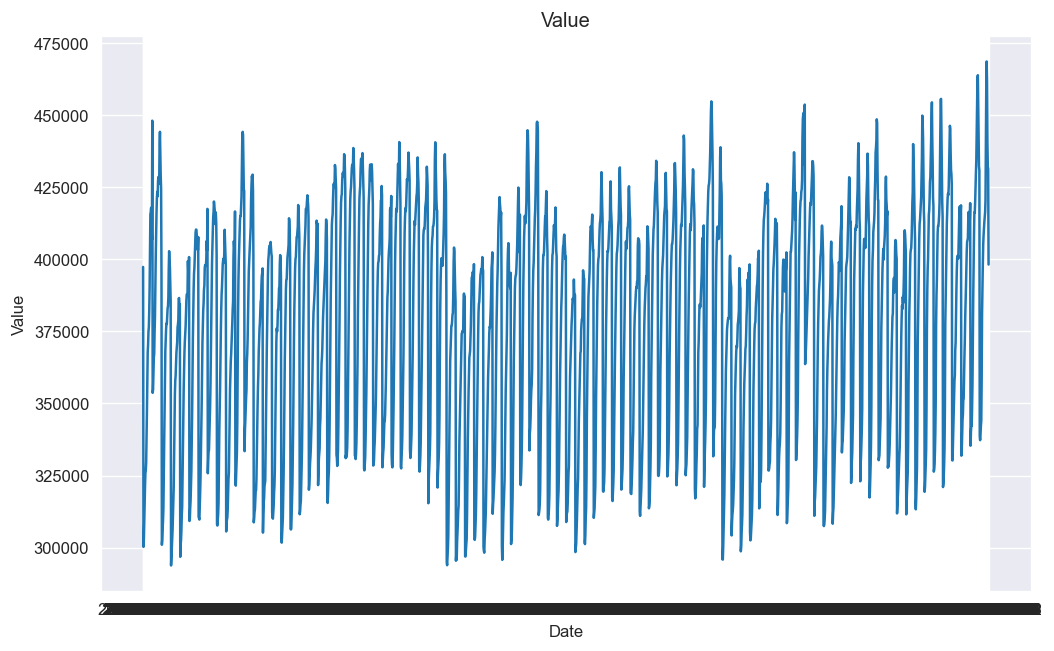

In [97]:
plt.plot(deliverable["Date"], deliverable['DeseasonalizedValue'])
plt.title('Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

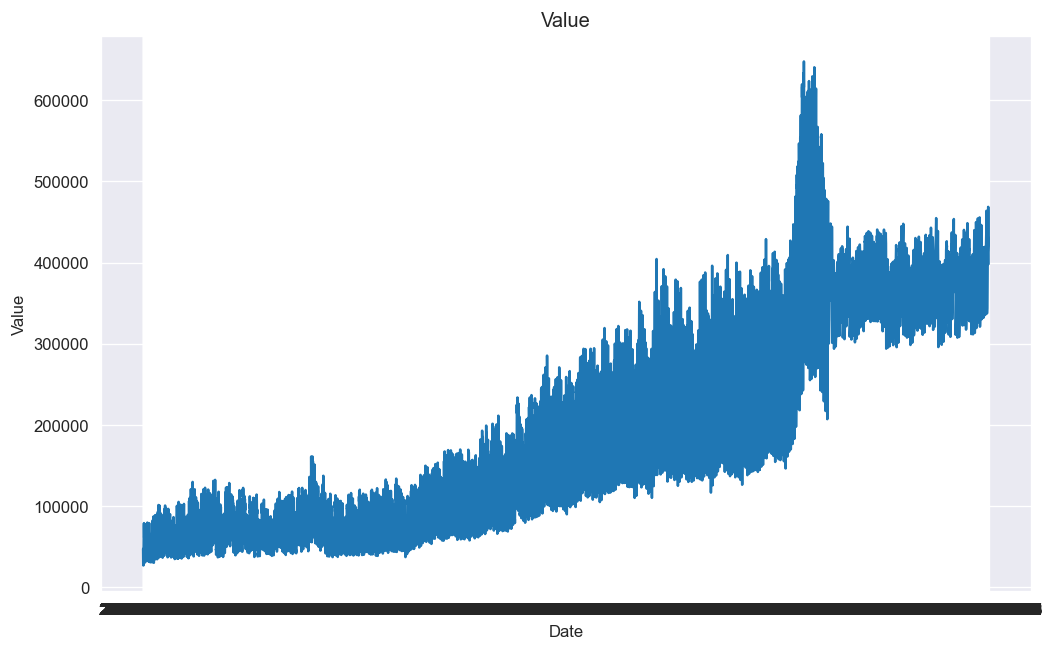

In [98]:
plt.plot(df2["Date"], df2['DeseasonalizedValue'])
plt.title('Value')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [99]:
deliverable

,Year,Month,Day,Hour,TotalEnergyGenerated_W,Price_EUR_Wh,Temperatures,DeseasonalizedRate,DeseasonalizedValue,Date
0,2017,8,1,24,2.534300e+10,0.000056,24.9,1.949795,397360.939494,2017-8-1-24
1,2017,8,1,1,2.360000e+10,0.000052,24.9,1.949963,300265.486033,2017-8-1-1
2,2017,8,1,2,2.333600e+10,0.000049,24.9,1.949963,302734.031643,2017-8-1-2
3,2017,8,1,3,2.388800e+10,0.000048,24.9,1.949963,309416.471758,2017-8-1-3
4,2017,8,1,4,2.446700e+10,0.000048,24.9,1.949963,316238.342632,2017-8-1-4
...,...,...,...,...,...,...,...,...,...,...
2204,2017,10,31,20,3.418400e+10,0.000080,18.5,1.954749,461749.594393,2017-10-31-20
2205,2017,10,31,21,2.936400e+10,0.000069,18.5,1.954749,440690.563532,2017-10-31-21
2206,2017,10,31,22,2.697500e+10,0.000062,18.5,1.954749,432185.425920,2017-10-31-22
2207,2017,10,31,23,2.608400e+10,0.000057,18.5,1.954749,431416.089285,2017-10-31-23
